<a href="https://colab.research.google.com/github/Hirpahuanca/DataScience/blob/main/002_An%C3%A1lisisExploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.FUNCIONES A USAR:
--------------------------------------------------------------------------

A continuación se mostrará las principales funciones que se usan en el análisis exploratorio.

#### 1.1. TABLA DE DISTRIBUCIÓN DE FRECUENCIAS

Permite resumir los datos basados en su cantidad de apariciones (frecuencias) dentro de una variable, puede ser aplicado a variables del tipo ordinal o nominal.

**Función para tener las frecuencias absolutas:**

table(variable,useNA='always',exclude=c('categoria1', 'categoria2'))

+ **variable:** Es la variable que se usará para la tabla de distribuciín de frecuencias
+ **useNA:** Se usa en caso se desea incluir los NA (vacíos en la tabla de distribución de frecuencias)
+ **exclude:** Se usa para excluir categorías de la tabla de distribución de frecuencias

In [ ]:
#Ejemplo:
#Se tiene la variable segmento
segmento<-c('A','C','A','A','B','C','B','A',NA,'C','C','A','A','A')


In [ ]:
#Ejemplo
#Obtener las frecuencias absolutas
table(segmento)

segmento
A B C 
7 2 4 

In [ ]:
#Ejemplo
#Obtener las frecuencias tomando en cuenta los NA
table(segmento,useNA='always')

segmento
   A    B    C <NA> 
   7    2    4    1 

**Funcion para tener frecuencias relativas:**

prop.table(tablaf)

+ tablaf: Es una tabla de distribución de frecuencias

In [ ]:
#Ejemplo: Obtener las frecuencias relativas de segmenos
tabla1<-table(segmento)
prop.table(tabla1)

segmento
        A         B         C 
0.5384615 0.1538462 0.3076923 

**Líneas para obtener la tabla de distribución de frecuncias absolutas y relativas:**

In [ ]:
#Ejemplo: Obtener los resultados todos juntos
#Se obtiene las frecuencias
tabla<-table(segmento)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Categoría", "Frecuencia Absoluta", "Frecuencia Relativa")
#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


Categoría,Frecuencia Absoluta,Frecuencia Relativa
<fct>,<int>,<dbl>
A,7,0.5384615
B,2,0.1538462
C,4,0.3076923


**Líneas para obtener la tabla de distribución de frecuncias absolutas y relativas - ORDENADO EN FORMA DESCENDENTE:**

In [ ]:
#Ejemplo: Obtener los resultados todos juntos, ORDENADO EN FORMA DESCENDENTE POR FRECUENCIAS
#Se obtiene las frecuencias
tabla<-table(segmento)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Categoría", "Frecuencia Absoluta", "Frecuencia Relativa")
#Se procede a ordenar (el signo "-" lo ordena de forma descendente si se omite se orden en forma ascendente)
tabla<- tabla[order(-tabla$`Frecuencia Absoluta`), ]
#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


,Categoría,Frecuencia Absoluta,Frecuencia Relativa
,<fct>,<int>,<dbl>
1,A,7,0.5384615
3,C,4,0.3076923
2,B,2,0.1538462


**Líneas para obtener la tabla de distribución de frecuncias absolutas y relativas - ORDENADO EN FORMA ASCENDENTE:**



In [ ]:
#Ejemplo:
#Se obtiene las frecuencias
tabla<-table(segmento)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Categoría", "Frecuencia Absoluta", "Frecuencia Relativa")
#Se ordena de manera ascendente
tabla<- tabla[order(tabla$`Frecuencia Absoluta`), ]
#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


,Categoría,Frecuencia Absoluta,Frecuencia Relativa
,<fct>,<int>,<dbl>
2,B,2,0.1538462
3,C,4,0.3076923
1,A,7,0.5384615


**Líneas para obtener la tabla de distribución de frecuncias absolutas y relativas - ORDENADO PERSONALIZADO:**

In [ ]:
#Ejemplo: Obtener la tabla de frecuencias, pero por el orden: B,A y C
#Se obtiene las frecuencias
tabla<-table(segmento)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Categoría", "Frecuencia Absoluta", "Frecuencia Relativa")
#Se aplica el ordenamiento personalizado
orden_personalizado <- c("B", "A", "C")
tabla$Categoría <- factor(tabla$Categoría, levels = orden_personalizado)
tabla <- tabla[order(tabla$Categoría), ]

#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


,Categoría,Frecuencia Absoluta,Frecuencia Relativa
,<fct>,<int>,<dbl>
2,B,2,0.1538462
1,A,7,0.5384615
3,C,4,0.3076923


#### 1.2. TABLA DE DISTRIBUCIÓN DE FRECUENCIAS PARA HACER COMPARACIONES

**Función para tener las frecuencias absolutas:**

Se puede usar:

prop.table(table(Variable1, Variable2), margin = 2) * 100

+ margin=1: Proporciones en filas
+ margin=2: Proporciones en columnas


In [ ]:
#Ejemplo: Crearemos este dataframe
# Datos
datos <- data.frame(
  segmento = c("A", "A", "A","A","B","B","B","B","B","B","C","C","C"),
  tarjeta = c("Si","Si","No","No", "Si", "Si", "Si", "Si", "Si","No","No","Si","No")
)

# Imprimir el dataframe
print(datos)


   segmento tarjeta
1         A      Si
2         A      Si
3         A      No
4         A      No
5         B      Si
6         B      Si
7         B      Si
8         B      Si
9         B      Si
10        B      No
11        C      No
12        C      Si
13        C      No


In [ ]:
#Ejemplo:
#Construir una tabla tomando los porcentajes en columna
tabla_cruzada <- prop.table(table(datos$tarjeta, datos$segmento), margin = 2) * 100
print(tabla_cruzada)

    
            A        B        C
  No 50.00000 16.66667 66.66667
  Si 50.00000 83.33333 33.33333


In [ ]:
#Ejemplo:
#Construir una tabla tomando los porcentajes en fila
tabla_cruzada <- prop.table(table(datos$tarjeta, datos$segmento), margin = 1) * 100
print(tabla_cruzada)

    
        A    B    C
  No 40.0 20.0 40.0
  Si 25.0 62.5 12.5


**1.3 Tabla de distribución de frecuencias para variables continuas:**

En este caso primero se debe formar intervalos con Sturges y luego se procede de la forma ya conocida.

**Función para determinar el número de intervalos:**

Se puede usar:

nclass.Sturges(variable)



In [ ]:
# Ejemplo: Calcular el número de intervalos según la regla de Sturges
variable1 <- c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,14)

num_intervalos <- nclass.Sturges(variable1)
print(num_intervalos)


[1] 5


Una vez que se tenga el número de intervalos se categoriza la variable

**Función para formar intervalos con igual ancho de clase:**

cut(variable, breaks = k)

+ variable: es continua y la cual se quiere categorizar
+ Número de categorías a formar

In [ ]:
#Ejemplo: Formar 5 intervalos con los datos del ejemplo anterior
variable_recodificada<-cut(variable1,breaks=5)
variable_recodificada

[1] (13,17.4]   (17.4,21.8] (17.4,21.8] (21.8,26.2] (30.6,35]   (30.6,35]  
 [7] (30.6,35]   (13,17.4]   (21.8,26.2] (21.8,26.2] (21.8,26.2] (30.6,35]  
[13] (13,17.4]   (13,17.4]  
Levels: (13,17.4] (17.4,21.8] (21.8,26.2] (26.2,30.6] (30.6,35]

En algunos casos se necesitan formar intervalos que no tengan igual ancho de clase

**Función para formar intervalos con diferentes ancho de clase:**

cut(variable, breaks = c(punto1,punto2,...,punton))

+ variable: es continua y la cual se requiere categorizar
+ c(puntos1,punto2,...,punton): Son los puntos que se usaran para formar los intervalos

In [ ]:
#Ejemplo: Formar 3 intervalos ((12,24] (24,27] (27,36])
variable_recodificada<-cut(variable1,breaks=c(min(variable1)-1,24,27,max(variable1)+1))
variable_recodificada

[1] (12,24] (12,24] (12,24] (12,24] (27,36] (27,36] (27,36] (12,24] (24,27]
[10] (24,27] (24,27] (27,36] (12,24] (12,24]
Levels: (12,24] (24,27] (27,36]

**1.4 Gráficos:**

**1.4.1 Gráfico de barras:**

Una manera práctica es usando

barplot(Tabla,                   #Se indica la variable que se formo  
        main="Título principal",    #Se pone el título del gráfico  
        xlab="Título del eje x",          #Se pone el gráfico al eje X  
        ylab="Título del eje y",        #Se pone el gráfico al eje Y  
        ylim = c(mínimo, máximo),           #Se coloca las dimensiones del eje Y  
        col="color",
        horiz=TRUE                     #Si se desea poner en posición horizontal, caso contrario se omite
        )   

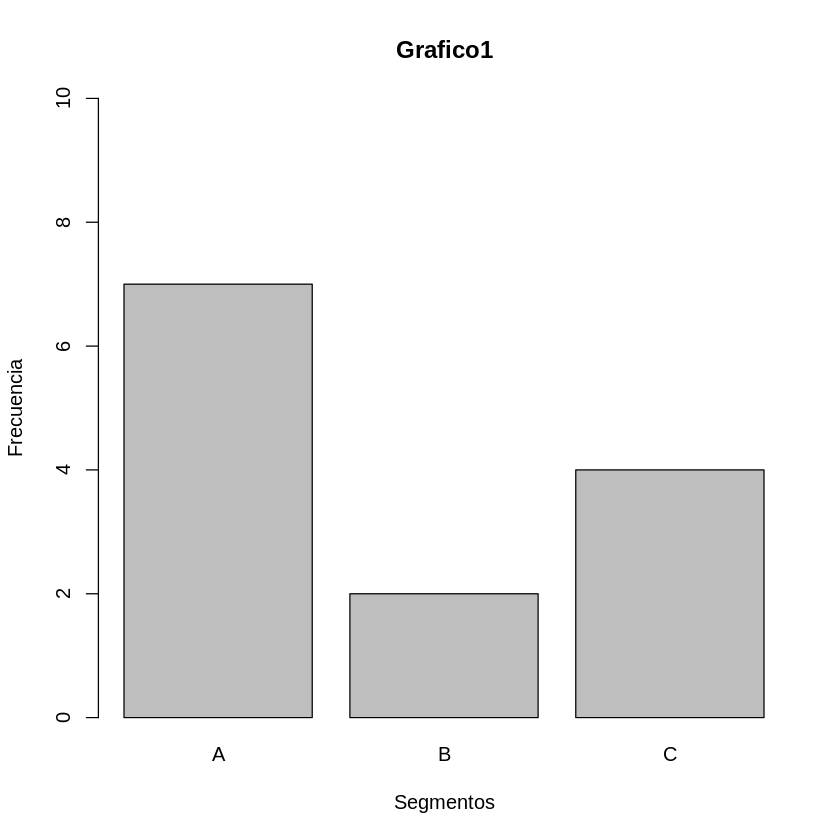

In [ ]:
#Ejemplo: Construir un gráfico de barras
segmento<-c('A','C','A','A','B','C','B','A','C','C','A','A','A')
tabla<-table(segmento)
barplot(tabla,                #Se indica la variable que se formo
        main="Grafico1",    #Se pone el título del gráfico
        xlab="Segmentos",          #Se pone el gráfico al eje X
        ylab="Frecuencia",        #Se pone el gráfico al eje Y
        ylim = c(0,10),           #Se coloca las dimensiones del eje Y
        col="grey",
       )

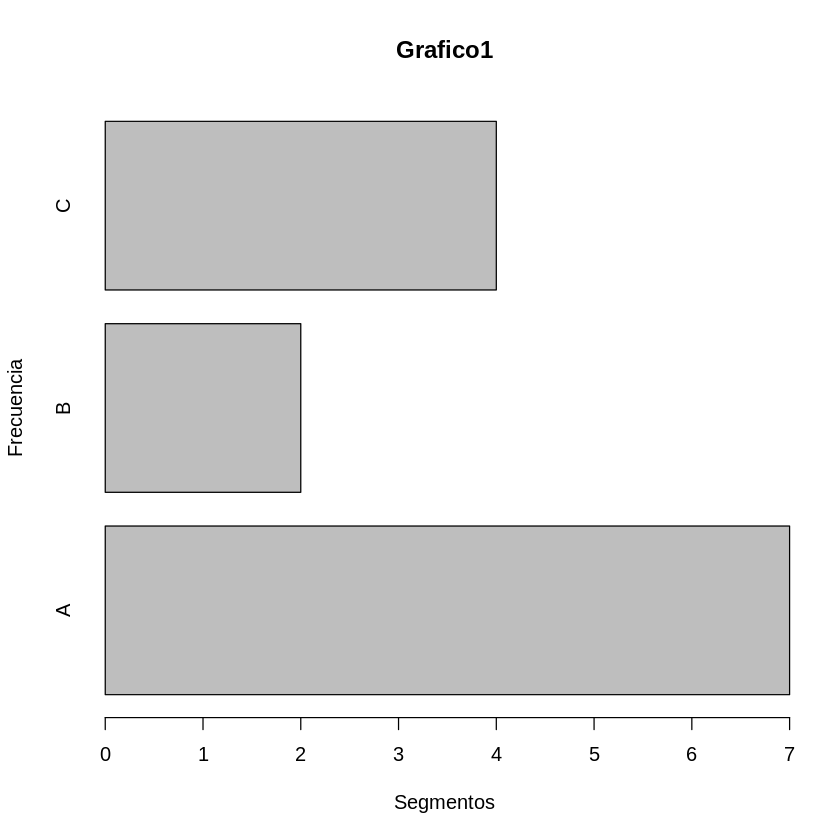

In [ ]:
#Ejemplo: Construir un gráfico de barras, en forma horizontal
segmento<-c('A','C','A','A','B','C','B','A','C','C','A','A','A')
tabla<-table(segmento)
barplot(tabla,                #Se indica la variable que se formo
        main="Grafico1",    #Se pone el título del gráfico
        xlab="Segmentos",          #Se pone el gráfico al eje X
        ylab="Frecuencia",        #Se pone el gráfico al eje Y
        col="grey",
        horiz=TRUE
       )

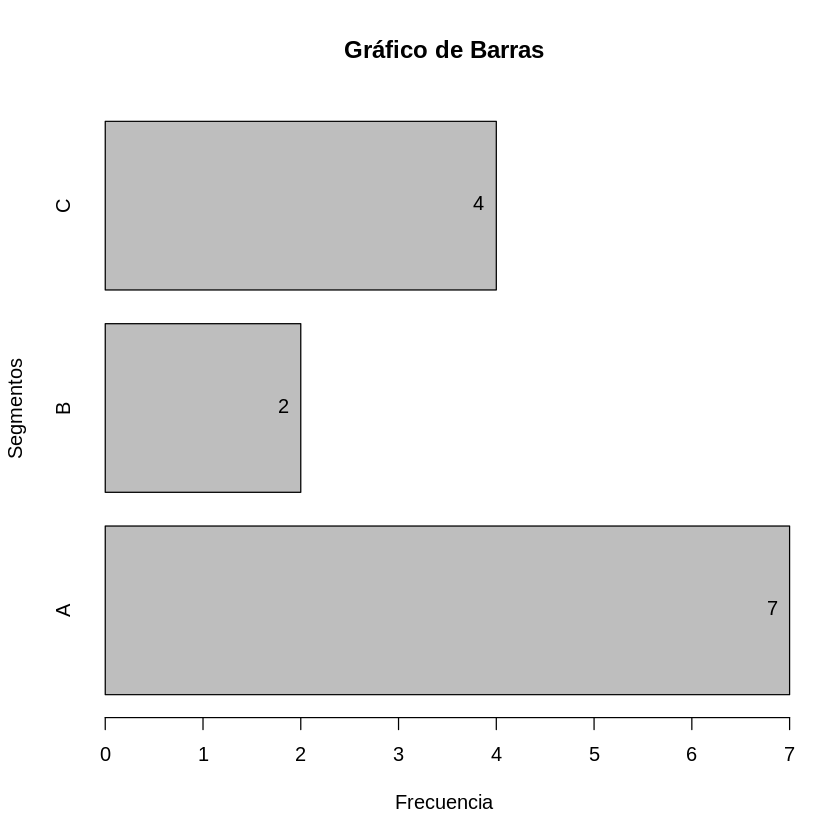

In [ ]:
#Ejemplo: Construir un gráfico de barras, en forma horizontal Y PONERLE ETIQUETAS
segmento <- c('A','C','A','A','B','C','B','A','C','C','A','A','A')
tabla <- table(segmento)

# Crear el gráfico de barras horizontal
bp <- barplot(tabla,
              main = "Gráfico de Barras",
              xlab = "Frecuencia",
              ylab = "Segmentos",
              col = "grey",
              horiz = TRUE
)

# Agregar etiquetas con frecuencias a las barras
text(tabla, bp, labels = tabla, pos = 2)


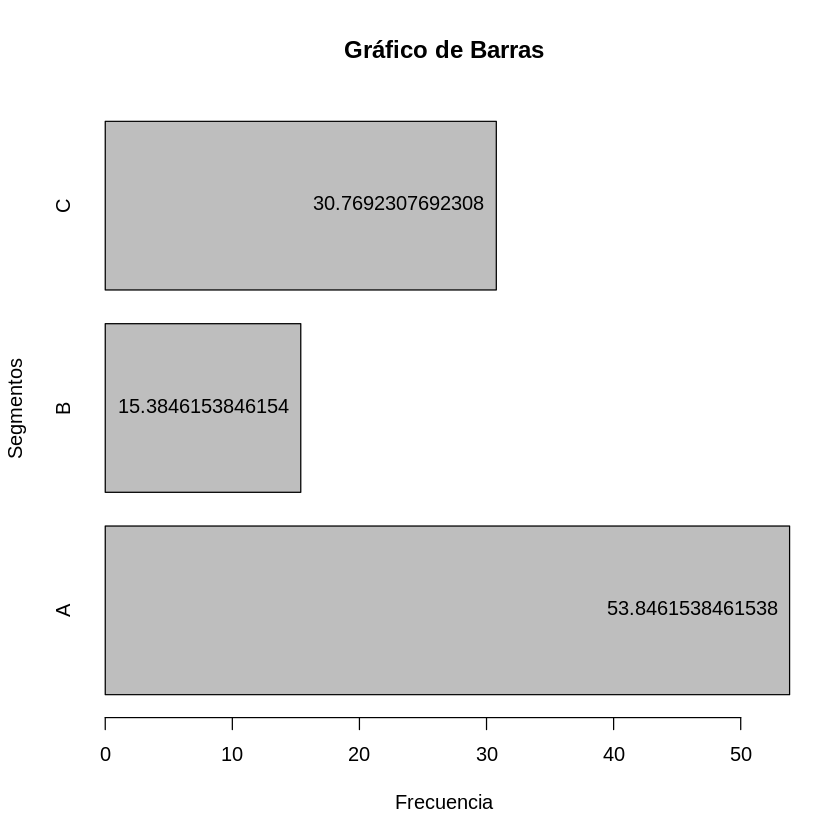

In [ ]:
#Ejemplo: Hacer la gráfica pero con porcentajes
segmento <- c('A','C','A','A','B','C','B','A','C','C','A','A','A')
tabla <- table(segmento)
tabla <- prop.table(tabla) * 100  # Calcular porcentajes
# Crear el gráfico de barras horizontal
bp <- barplot(tabla,
              main = "Gráfico de Barras",
              xlab = "Frecuencia",
              ylab = "Segmentos",
              col = "grey",
              horiz = TRUE
)

# Agregar etiquetas con frecuencias a las barras
text(tabla, bp, labels = tabla, pos = 2)


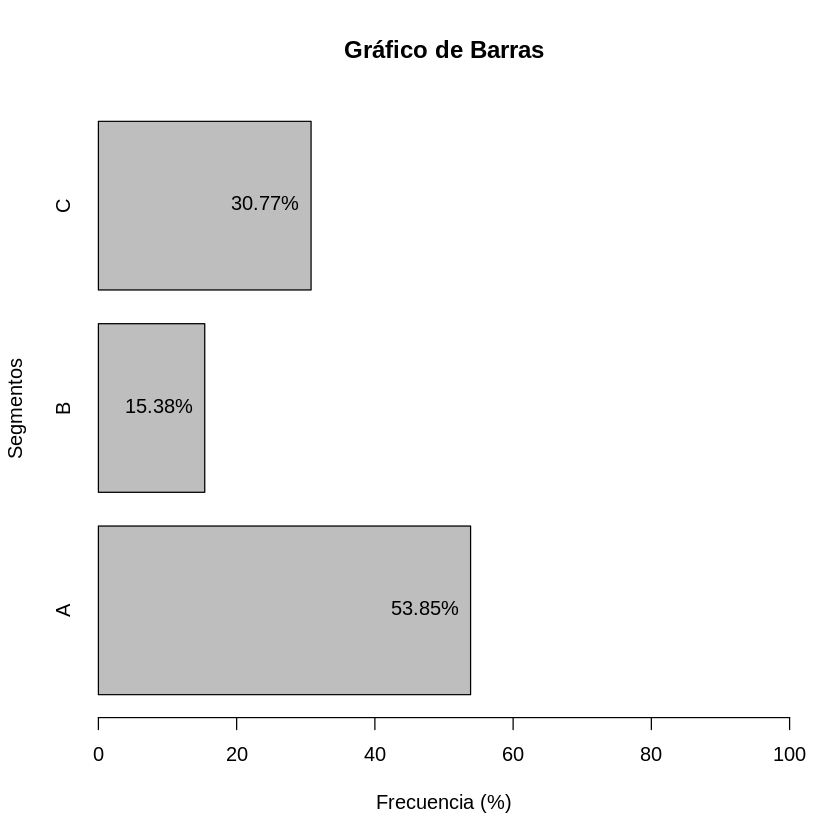

In [ ]:
# Ejemplo: Hacer la gráfica con porcentajes y reducir a dos decimales
#Mejorando la presentación
segmento <- c('A','C','A','A','B','C','B','A','C','C','A','A','A')
tabla <- table(segmento)
tabla <- prop.table(tabla) * 100  # Calcular porcentajes
tabla_redondeada <- round(tabla, 2)  # Reducir a dos decimales

# Crear el gráfico de barras horizontal
bp <- barplot(tabla,
              main = "Gráfico de Barras",
              xlab = "Frecuencia (%)",
              ylab = "Segmentos",
              col = "grey",
              horiz = TRUE,
              xlim=c(0,100)
)

# Agregar etiquetas con porcentajes redondeados a las barras
text(tabla, bp, labels = paste0(tabla_redondeada, "%"), pos = 2)


**1.4.2 Gráfico pie:**

Se puede usar lo siguiente:

pie(Tabla)

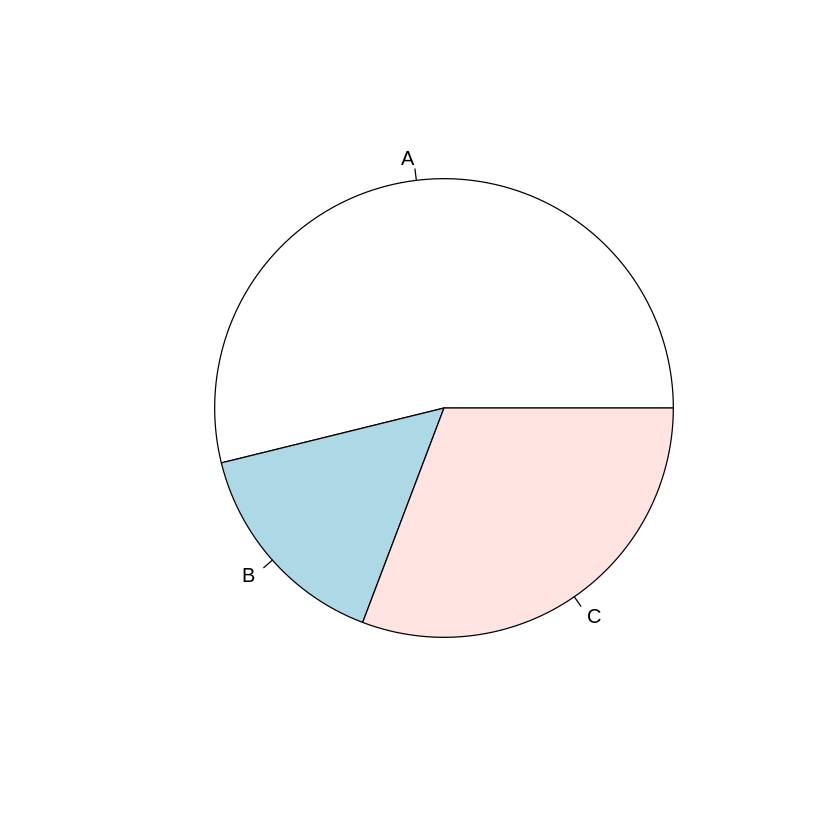

In [ ]:
#Ejemplo: Construir un gráfico pie
segmento <- c('A','C','A','A','B','C','B','A','C','C','A','A','A')
tabla <- table(segmento)
pieb<-pie(tabla)

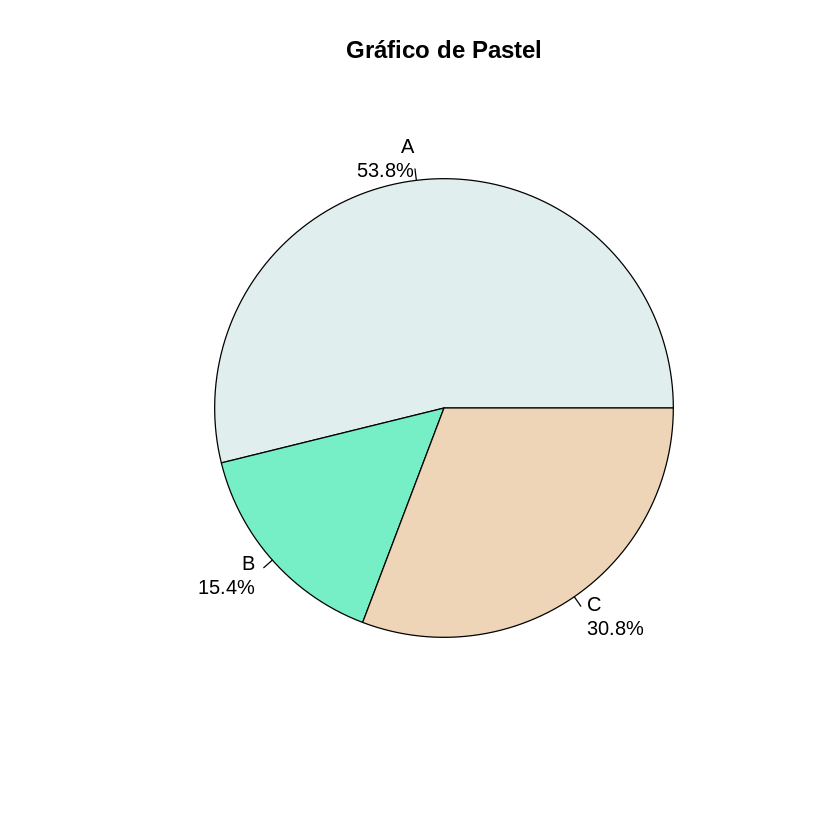

In [ ]:
# Ejemplo: Construir un gráfico pie con frecuencias en las rebanadas
segmento <- c('A','C','A','A','B','C','B','A','C','C','A','A','A')
tabla <- table(segmento)
porcentajes <- prop.table(tabla) * 100  # Calcular porcentajes

# Crear el gráfico de pastel con frecuencias en las rebanadas
pieb <- pie(tabla,
            labels = sprintf("%s\n%.1f%%", names(tabla), porcentajes),
            col = c("azure2", "aquamarine2", "bisque2"),
            main = "Gráfico de Pastel"
)




Los colores disponibles en R se puede consultar:

https://r-charts.com/es/colores/#google_vignette


**1.5 Medidas de tendencia central:**


Para obtener las medidas de tendencia central y variabilidad se puede usar "describe" que dará los siguientes resultados:

| Resultado | Significado |
| --- | --- |
| n: | número de casos |
| mean: | media |
| sd: | Desviación |
| median: | mediana |
| trimmed: | Media recortada al 10% |
| mad: | Mediana de las desviaciones absolutas |
| min: | Mínimo |
| max: | Máximo |
| range: | Rango |
| skew: | Asimetría |
| kurtosis: | Curtosis |
| se: | Error estándar media |

Nota: *MAD: La mediana de las desviaciones absolutas, se calcula tomando la mediana de las diferencias en valor absoluto de cada valor con la mediana, es una medida de dispersión.

*El error estándar media:  es el error de estimación por trabajar por muestras es igual a sd/raiz(n)

Se requiere instalar:#Para poder usar "describe" se necesita la librería "psych"
install.packages("psych")
library("psych")

Si se desea tener descriptivos por grupos:
**describeBy(variabke,grupos)**

In [ ]:
#Para poder usar "describe" se necesita la librería "psych"
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
library(psych)
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,14)
describe(variable)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,14,23.28571,7.415458,24.5,23.16667,9.6369,13,35,22,-0.0005362327,-1.547583,1.981864


**1.6 Medias de posición**:

Se puede usar la "quantile", y trabaja de la siguiente manera:  

quantile(Variable,c(posición))

In [ ]:
#Ejemplo:
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,14)
#Percentil 25 (Cuartil 1)
quantile(variable, c(0.25))
#Percentil 50 (Cuartil 2)
quantile(variable, c(0.50))
#Percentil 75 (Cuartil 3)
quantile(variable, c(0.75))
#Percentil 90
quantile(variable, c(0.90))

25% 
16.5

50% 
24.5

75% 
29.75

90% 
31.7

**1.7 Histograma:**

Los histogramas son usados para variable cuantitativos, y se pueden construir con

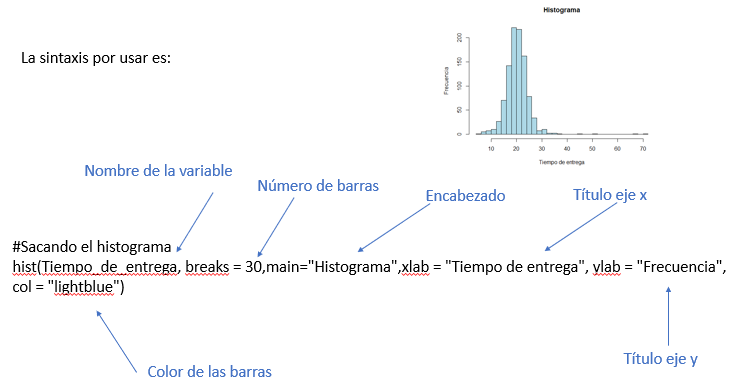

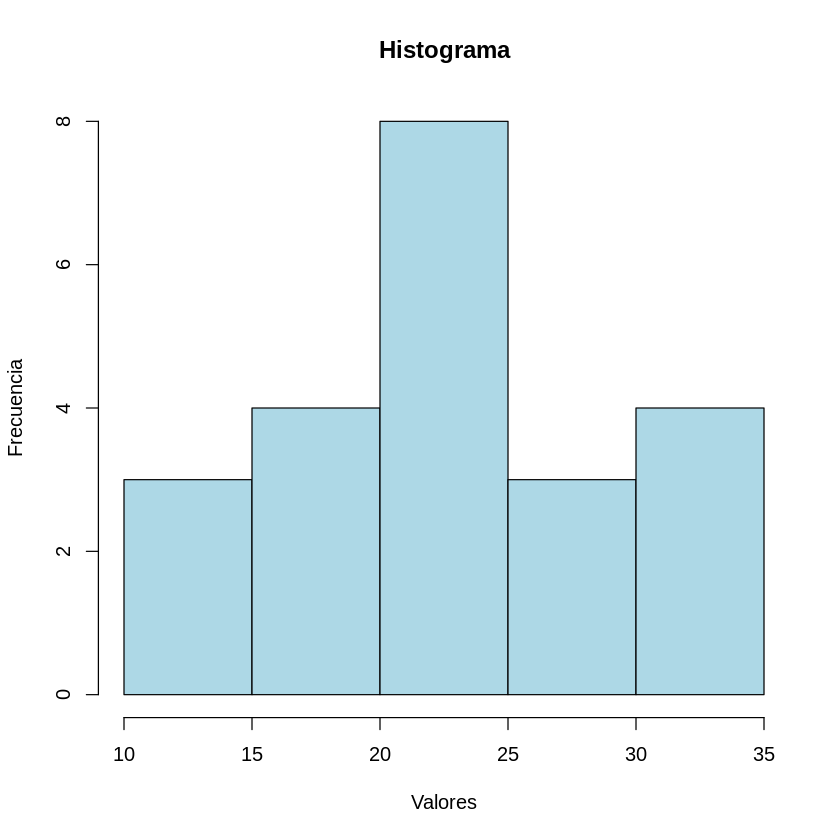

In [ ]:
#Ejemplo:
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,17,12,22,23,17,25,28,25,24)
#Sacando el histograma
hist(variable, breaks = 5,main="Histograma",xlab = "Valores", ylab = "Frecuencia", col = "lightblue")

**1.8 Gráfico de cajas:**

Se puede usar la siguiente función:

boxplot(x,main="sssss",ylab="ssss",xlab="sss",col="sss",horizontal=TRUE)

Donde:

+ x: Es la variable que se analiza
+ main: "Título del gráfico"
+ ylab: Etiquetas del eje y
+ xlab: Etiquetas del eje x
+ col: Color de las cajas
+ horizontal: sólo se usa si se desea la gráfica en posición horizontal

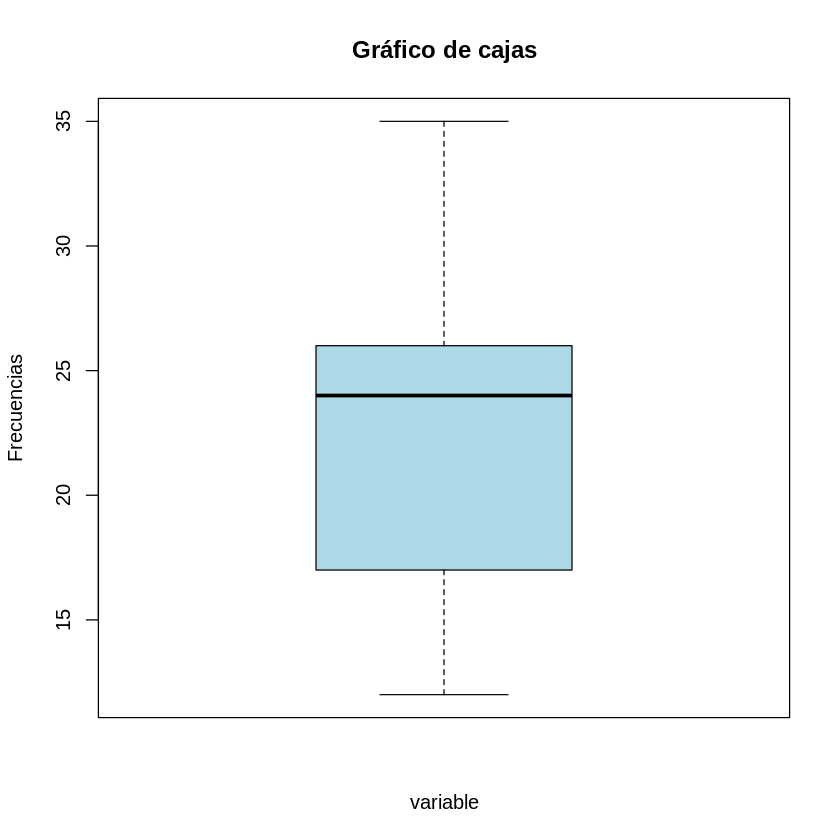

In [ ]:
#Ejemplo: Trabajar un diagrama de cajas
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,17,12,22,23,17,25,28,25,24)
boxplot(variable,main="Gráfico de cajas",xlab="variable",ylab="Frecuencias",col="lightblue")

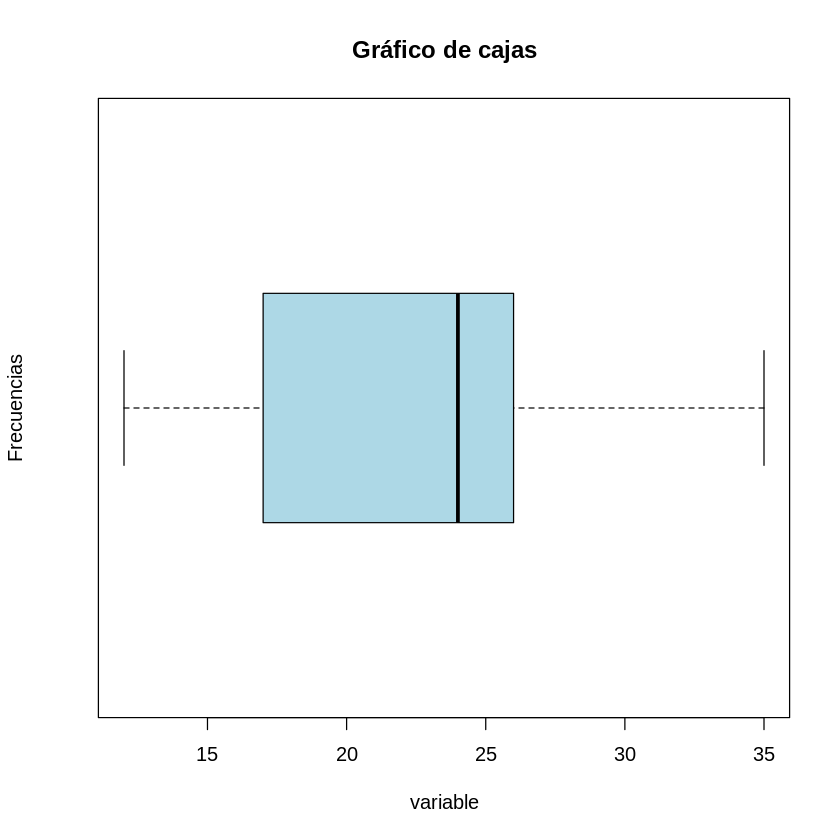

In [ ]:
#Ejemplo: Trabajar un diagrama de cajas pero en forma horizontal
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,17,12,22,23,17,25,28,25,24)
boxplot(variable,main="Gráfico de cajas",xlab="variable",ylab="Frecuencias",col="lightblue",horizontal=TRUE)

**1.9 Valores atípicos:**

**1.9.1 Criterio del rango intercuartílico:**

In [ ]:
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,17,12,22,23,17,25,28,25,124)


#Hallamos los límites para identificar los outliers
#*******************************************************
#Hallano el Primer cuartil
Q1=quantile(variable, c(0.25))
#Hallanto el Tercer cuartil
Q3=quantile(variable, c(0.75))
#Hallando el rango intercuartilico
RI=Q3-Q1
#Hallando el límite inferior
LI=Q1-1.5*RI
#Hallando el límite superior
LS=Q3+1.5*RI

# Contar valores por encima y por debajo de los límites
valores_por_encima <- sum(variable > LS)
valores_por_debajo <- sum(variable < LI)

print(paste("Límite inferior:", LI))
print(paste("Límite superior:", LS))
print(paste("Valores por encima de LS:", valores_por_encima))
print(paste("Valores por debajo de LI:", valores_por_debajo))

[1] "Límite inferior: 1.875"
[1] "Límite superior: 42.875"
[1] "Valores por encima de LS: 1"
[1] "Valores por debajo de LI: 0"


Si en caso se desea eliminar los valores atípicos se puede hacer:

In [ ]:
#Ejemplo:
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,17,12,22,23,17,25,28,25,124)
variable_nueva <- variable[variable < 42.875]
variable_nueva

[1] 13 18 21 24 31 32 35 14 26 25 26 31 16 17 12 22 23 17 25 28 25

**1.9.2 Criterio de los z scores:**

En este caso se debe estandarizar la variable y un valor atípico debe ser aquel que este por encima de 3 o por debajo de -3.

In [ ]:
variable<-c(13, 18, 21, 24, 31, 32, 35, 14, 26, 25, 26, 31, 16,17,12,22,23,17,25,28,25,124)

#Formando la variable estandarizado
Variable_estandarizada<-(variable-mean(variable))/sd(variable)
Variable_estandarizada

[1] -0.64486160 -0.42249553 -0.28907589 -0.15565625  0.15565625  0.20012946
 [7]  0.33354910 -0.60038838 -0.06670982 -0.11118303 -0.06670982  0.15565625
[13] -0.51144196 -0.46696874 -0.68933481 -0.24460267 -0.20012946 -0.46696874
[19] -0.11118303  0.02223661 -0.11118303  4.29166511

In [ ]:
# Contar valores por encima y por debajo de los límites
valores_por_encima <- sum(Variable_estandarizada > 3)
valores_por_debajo <- sum(Variable_estandarizada < -3)
#Mostrar los resultados
print(paste("Valores por encima de 3:", valores_por_encima))
print(paste("Valores por debajo de -3:", valores_por_debajo))

[1] "Valores por encima de 3: 1"
[1] "Valores por debajo de -3: 0"


**1.10 Valores perdidos**

Sólo se evaluará el método por media/mediana/moda. Para el caso de modelamiento se puede aplicar el procedimiento de dicotomizar.

**Función para identificar los valores perdidos:**

colSums(is.na(x))

Donde:
+ x: dataframe

In [ ]:
#Ejemplo:
datos <- data.frame(
  segmento = c(NA, "A", "A","A",NA,"B","B","B","B","B","C","C","C"),
  tarjeta = c(14.1,12.3,13.2,12.5, 13.3, 14.4, 15.1, 13.3, 13.5,14.2,15.1,12.4,NA)
)


colSums(is.na(datos))

segmento  tarjeta 
       2        1

Reemplazando por una media:

variable [ is.na (variable)] <- mean (variable, na.rm = TRUE )

Lo que hace es buscar en la variable objetivo y reemplazarlo por la media (que no tomará en cuenta los vacíos)

In [ ]:
#Ejemplo:
datos$tarjeta [ is.na (datos$tarjeta)] <-mean (datos$tarjeta, na.rm = TRUE )
datos$tarjeta

[1] 14.10000 12.30000 13.20000 12.50000 13.30000 14.40000 15.10000 13.30000
 [9] 13.50000 14.20000 15.10000 12.40000 13.61667

Ahora reemplazando en una cualitativa


In [ ]:
#Ejemplo:
datos$segmento [ is.na (datos$segmento)] <-"B"
datos$segmento

[1] "B" "A" "A" "A" "B" "B" "B" "B" "B" "B" "C" "C" "C"

### 2.APLICACIONES:
--------------------------------------------------------------------------

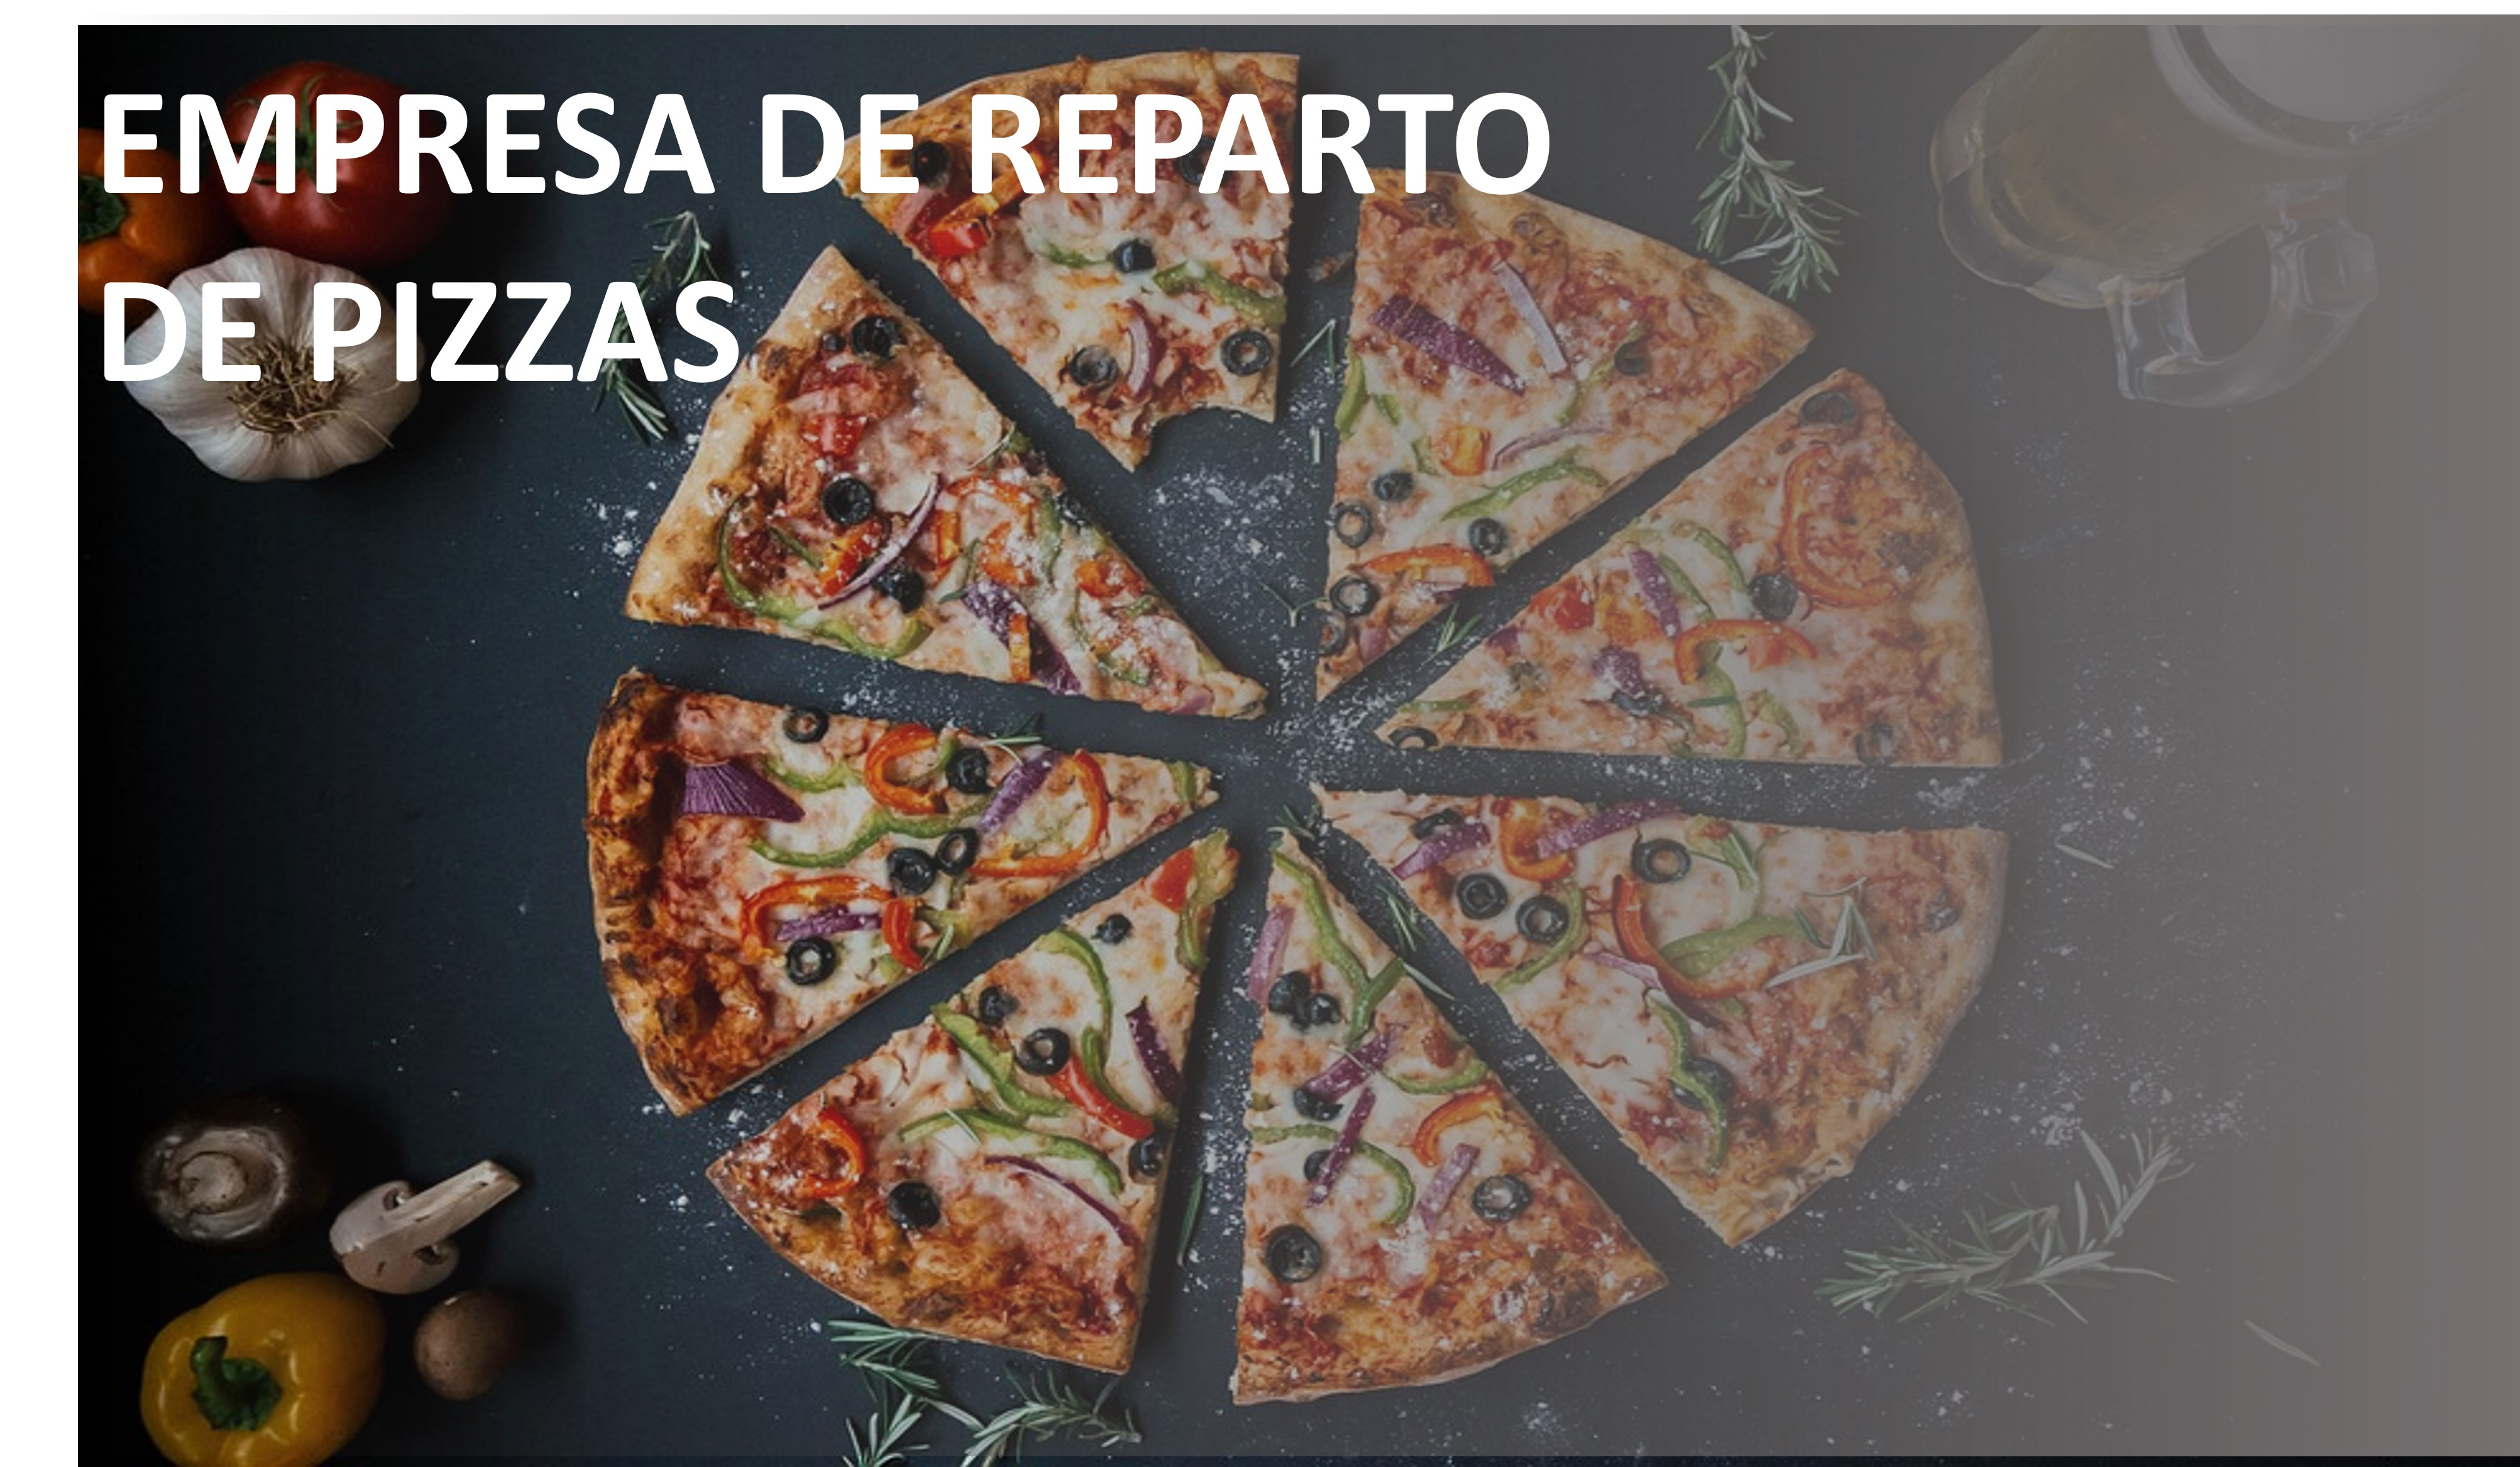

Due Pizza, una empresa surgida en el año 2020 durante los primeros compases de la pandemia, ha establecido su presencia con éxito en la ciudad de Lima mediante cuatro locales. Cada uno de estos puntos de venta ofrece una variada selección de pizzas: Hawaiana, Bolognesa, Americana, Pepperoni y Chorizo. A pesar de las diferencias en los sabores, todas las pizzas se comercializan a un precio uniforme de S/30 por unidad. La esencia de su propuesta radica en la entrega de pizzas irresistiblemente sabrosas y recién horneadas en el menor lapso posible. Dado este último criterio, la gestión eficiente del tiempo se convierte en una prioridad constante. La compañía se compromete a mantener la promesa de que, en promedio, cada pizza llegará a su destino en un tiempo récord de 20 minutos. Este nivel de eficacia es respaldado por la estratégica limitación de su radio de pedidos, lo que les permite mantener un área cercana a sus sucursales, asegurando así la puntualidad y calidad en la entrega, alineándose con las expectativas y satisfacción de su clientela.

Adicionalmente la empresa siempre al finalizar un pedido piden al cliente dar una evaluación del servicio, que se categoriza como sigue:

| Escala |
| --- |
| Muy Insatisfecho |
| Insatisfecho: |
| Ni Satisfecho/Ni Insatisfecho |
| Satisfecho |
| Muy Satisfecho |

Los dueños para analizar la situación global de la empresa y de cada uno de los locales, desea analziar los datos de los últimos pedidos que se han realizado y así poder ver si hay que hacer mejoras.

La data se llama pizza.csv, y contiene las siguientes variables:

| Variable | Significado |
| --- | --- |
| Pedido: | Número de pedido |
| Sucursal: | Sucursal |
| Tipo1: | Primer tipo de pizza comprado (Hawaiana, Bolognesa, Americana, Pepperoni,Chorizo) |
| Tipo2: | Segundo tipo de pizza comprado (Hawaiana, Bolognesa, Americana, Pepperoni,Chorizo) |
| Tipo3: | Tercero tipo de pizza comprado (Hawaiana, Bolognesa, Americana, Pepperoni,Chorizo) |
| Tipo4: | Cuarto tipo de pizza comprado (Hawaiana, Bolognesa, Americana, Pepperoni,Chorizo) |
| Tipo5: | Quinto tipo de pizza comprado (Hawaiana, Bolognesa, Americana, Pepperoni,Chorizo) |
| Cantidad1: | Número de pizzas comprados del tipo1 |
| Cantidad2: | Número de pizzas comprados del tipo2 |
| Cantidad3: | Número de pizzas comprados del tipo3 |
| Cantidad4: | Número de pizzas comprados del tipo4 |
| Cantidad5: | Número de pizzas comprados del tipo5 |
| dia: | Día de la semana de compra |
| tiempo: | tiempo de entrega (minutos) |
| evaluacion: | evaluacion de satisfacción |
| FinSemana: | Se revisa si la compra fue en fin de semana(sabado/domingo) o NO

Los objetivos que se plantea en el estudio son:

+ O1.Evaluar la aceptación de los diferentes tipos de pizza para determinar si es necesario retirar algún sabor de la carta.
  
+ O2.Identificar el intervalo de tiempo en el que se encuentra el 90% de los pedidos realizados para comprender mejor los patrones de demanda.  

+ O3.Determinar la necesidad de gestionar los recursos, especialmente repartidores, de manera diferenciada entre días de la semana y los fines de semana para optimizar la eficiencia operativa.  

+ O4.Calcular el ticket promedio por compra para comprender el gasto medio de los clientes y la rentabilidad.

+ O5.Analizar si se están cumpliendo los tiempos de entrega tanto en el nivel total de la empresa como en cada local individualmente.

+ O6.Evaluar la necesidad de implementar reformas en la administración de alguno de los locales para mejorar la eficiencia y el servicio.

+ O7.Medir el nivel de satisfacción de los clientes para identificar áreas de mejora y asegurarse de que la experiencia cumpla con sus expectativas


# Solución:

Lo primero que se debe hacer es tener el archivo de trabajo

**1. Carga de datos y revisión inicial de los datos:**

En esta primera parte se cargará la base de datos, y se dará una revisión previa de los datos

In [ ]:
#Cargamos la base de datos
datap<-read.csv("pizza.csv",header = TRUE)

In [ ]:
head(datap,n=10L)

,Pedido,Sucursal,tipo1,tipo2,tipo3,tipo4,tipo5,cantidad1,cantidad2,cantidad3,cantidad4,cantidad5,dia,tiempo,evaluacion,FinSemana
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,Sucursal1,4,NA,NA,NA,NA,1,NA,NA,NA,NA,6,20,3,Si
2,2,Sucursal1,1,NA,NA,NA,NA,1,NA,NA,NA,NA,6,20,3,Si
3,3,Sucursal1,1,NA,NA,NA,NA,1,NA,NA,NA,NA,2,18,4,No
4,4,Sucursal1,4,NA,NA,NA,NA,1,NA,NA,NA,NA,4,NA,3,No
5,5,Sucursal1,5,NA,NA,NA,NA,1,NA,NA,NA,NA,5,20,3,Si
6,6,Sucursal1,1,NA,NA,NA,NA,2,NA,NA,NA,NA,5,20,3,Si
7,7,Sucursal1,4,1,2,NA,NA,1,1,3,NA,NA,6,21,2,Si
8,8,Sucursal1,4,1,NA,NA,NA,1,2,NA,NA,NA,5,24,2,Si
9,9,Sucursal1,1,NA,NA,NA,NA,1,NA,NA,NA,NA,5,22,2,Si


Revisando la cantidad de registros y variables

In [ ]:
#Mostrando filas y columnas
dim(datap)

[1] 6472   16

In [ ]:
str(datap)

'data.frame':	6472 obs. of  16 variables:
 $ Pedido    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Sucursal  : chr  "Sucursal1" "Sucursal1" "Sucursal1" "Sucursal1" ...
 $ tipo1     : int  4 1 1 4 5 1 4 4 1 4 ...
 $ tipo2     : int  NA NA NA NA NA NA 1 1 NA 2 ...
 $ tipo3     : int  NA NA NA NA NA NA 2 NA NA NA ...
 $ tipo4     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ tipo5     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ cantidad1 : int  1 1 1 1 1 2 1 1 1 1 ...
 $ cantidad2 : int  NA NA NA NA NA NA 1 2 NA 1 ...
 $ cantidad3 : int  NA NA NA NA NA NA 3 NA NA NA ...
 $ cantidad4 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ cantidad5 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ dia       : int  6 6 2 4 5 5 6 5 5 7 ...
 $ tiempo    : int  20 20 18 NA 20 20 21 24 22 20 ...
 $ evaluacion: int  3 3 4 3 3 3 2 2 2 3 ...
 $ FinSemana : chr  "Si" "Si" "No" "No" ...


**2. Colocando etiquetas a las variables**:

In [ ]:
#Crear un vector con los códigos
codigos<-c(1,2,3,4,5)

#Creando las etiquetas
etiquetas<-c("Hawaiana","Bolognesa","Americana","Pepperoni","Chorizo")

#Definiendo la variable en donde se etiqueta
datap$tipo1<-factor(datap$tipo1,levels=codigos,labels=etiquetas)
datap$tipo2<-factor(datap$tipo2,levels=codigos,labels=etiquetas)
datap$tipo3<-factor(datap$tipo3,levels=codigos,labels=etiquetas)
datap$tipo4<-factor(datap$tipo4,levels=codigos,labels=etiquetas)
datap$tipo5<-factor(datap$tipo5,levels=codigos,labels=etiquetas)

In [ ]:
#Visualizando como va quedando los datos
head(datap,n=10L)

,Pedido,Sucursal,tipo1,tipo2,tipo3,tipo4,tipo5,cantidad1,cantidad2,cantidad3,cantidad4,cantidad5,dia,tiempo,evaluacion,FinSemana
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,6,20,3,Si
2,2,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,6,20,3,Si
3,3,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,2,18,4,No
4,4,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,4,NA,3,No
5,5,Sucursal1,Chorizo,NA,NA,NA,NA,1,NA,NA,NA,NA,5,20,3,Si
6,6,Sucursal1,Hawaiana,NA,NA,NA,NA,2,NA,NA,NA,NA,5,20,3,Si
7,7,Sucursal1,Pepperoni,Hawaiana,Bolognesa,NA,NA,1,1,3,NA,NA,6,21,2,Si
8,8,Sucursal1,Pepperoni,Hawaiana,NA,NA,NA,1,2,NA,NA,NA,5,24,2,Si
9,9,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,5,22,2,Si


In [ ]:
#Etiquetando la variable evaluación

#Crear un vector con los códigos
codigos<-c(1,2,3,4,5)

#Creando las etiquetas
etiquetas<-c("1.Muy insatisfecho","2.Insatisfecho","3.Ni satisfecho/ni insatisfecho","4. Satisfecho","5.Muy satisfecho")

#Definiendo la variable en donde se etiqueta
datap$evaluacion<-factor(datap$evaluacion,levels=codigos,labels=etiquetas)


In [ ]:
#Visualizando como va quedando los datos
head(datap,n=8L)

,Pedido,Sucursal,tipo1,tipo2,tipo3,tipo4,tipo5,cantidad1,cantidad2,cantidad3,cantidad4,cantidad5,dia,tiempo,evaluacion,FinSemana
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<chr>
1,1,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,6,20,3.Ni satisfecho/ni insatisfecho,Si
2,2,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,6,20,3.Ni satisfecho/ni insatisfecho,Si
3,3,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,2,18,4. Satisfecho,No
4,4,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,4,NA,3.Ni satisfecho/ni insatisfecho,No
5,5,Sucursal1,Chorizo,NA,NA,NA,NA,1,NA,NA,NA,NA,5,20,3.Ni satisfecho/ni insatisfecho,Si
6,6,Sucursal1,Hawaiana,NA,NA,NA,NA,2,NA,NA,NA,NA,5,20,3.Ni satisfecho/ni insatisfecho,Si
7,7,Sucursal1,Pepperoni,Hawaiana,Bolognesa,NA,NA,1,1,3,NA,NA,6,21,2.Insatisfecho,Si
8,8,Sucursal1,Pepperoni,Hawaiana,NA,NA,NA,1,2,NA,NA,NA,5,24,2.Insatisfecho,Si


In [ ]:
#ETIQUETANDO DIA DE LA SEMANA
#Crear un vector con los códigos
codigos<-c(1,2,3,4,5,6,7)

#Creando las etiquetas
etiquetas<-c("lunes","martes","miercoles","jueves","viernes","sabado","domingo")

#Definiendo la variable en donde se etiqueta
datap$dia<-factor(datap$dia,levels=codigos,labels=etiquetas)

In [ ]:
head(datap)

,Pedido,Sucursal,tipo1,tipo2,tipo3,tipo4,tipo5,cantidad1,cantidad2,cantidad3,cantidad4,cantidad5,dia,tiempo,evaluacion,FinSemana
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<chr>
1,1,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,sabado,20,3.Ni satisfecho/ni insatisfecho,Si
2,2,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,sabado,20,3.Ni satisfecho/ni insatisfecho,Si
3,3,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,martes,18,4. Satisfecho,No
4,4,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,jueves,NA,3.Ni satisfecho/ni insatisfecho,No
5,5,Sucursal1,Chorizo,NA,NA,NA,NA,1,NA,NA,NA,NA,viernes,20,3.Ni satisfecho/ni insatisfecho,Si
6,6,Sucursal1,Hawaiana,NA,NA,NA,NA,2,NA,NA,NA,NA,viernes,20,3.Ni satisfecho/ni insatisfecho,Si


Creando la variable ticket:
Se formará de sumar las variables cantidad1,cantidad2,...cantidad5 y se multiplica *30

In [ ]:
datap$ticket<-30*rowSums(datap[,c("cantidad1","cantidad2","cantidad3","cantidad4","cantidad5")],na.rm = TRUE)

In [ ]:
head(datap,n=10L)

,Pedido,Sucursal,tipo1,tipo2,tipo3,tipo4,tipo5,cantidad1,cantidad2,cantidad3,cantidad4,cantidad5,dia,tiempo,evaluacion,FinSemana,ticket
,<int>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<chr>,<dbl>
1,1,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,sabado,20,3.Ni satisfecho/ni insatisfecho,Si,30
2,2,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,sabado,20,3.Ni satisfecho/ni insatisfecho,Si,30
3,3,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,martes,18,4. Satisfecho,No,30
4,4,Sucursal1,Pepperoni,NA,NA,NA,NA,1,NA,NA,NA,NA,jueves,NA,3.Ni satisfecho/ni insatisfecho,No,30
5,5,Sucursal1,Chorizo,NA,NA,NA,NA,1,NA,NA,NA,NA,viernes,20,3.Ni satisfecho/ni insatisfecho,Si,30
6,6,Sucursal1,Hawaiana,NA,NA,NA,NA,2,NA,NA,NA,NA,viernes,20,3.Ni satisfecho/ni insatisfecho,Si,60
7,7,Sucursal1,Pepperoni,Hawaiana,Bolognesa,NA,NA,1,1,3,NA,NA,sabado,21,2.Insatisfecho,Si,150
8,8,Sucursal1,Pepperoni,Hawaiana,NA,NA,NA,1,2,NA,NA,NA,viernes,24,2.Insatisfecho,Si,90
9,9,Sucursal1,Hawaiana,NA,NA,NA,NA,1,NA,NA,NA,NA,viernes,22,2.Insatisfecho,Si,30


In [ ]:
#Mostrando valores perdidos por variables
colSums(is.na(datap))

Pedido   Sucursal      tipo1      tipo2      tipo3      tipo4      tipo5 
         0          0          0       3193       6161       6413       6445 
 cantidad1  cantidad2  cantidad3  cantidad4  cantidad5        dia     tiempo 
         0       3193       6161       6413       6445          2          7 
evaluacion  FinSemana     ticket 
         0          0          0

**3. Análisis de datos:**

**O1.Evaluar la aceptación de los diferentes tipos de pizza para determinar si es necesario retirar algún sabor de la carta**:

Lógica, se revisará la **tabla de distribución de frecuencias** de las cantidades pedidas por tipo de pizza(Hawaiana, Americana, et). Luego de revisarlo, la que tenga menor frecuencia significará que es la menos solicitada y por lo tanto podría salir de la carta.

In [ ]:
#Formando columnas donde se agrupen las diferentes opciones de tipo
respuesta_tipo<-na.omit(c(datap$tipo1,datap$tipo2,datap$tipo3,datap$tipo4,datap$tipo5))
respuesta_cantidad<-na.omit(c(datap$cantidad1,datap$cantidad2,datap$cantidad3,datap$cantidad4,datap$cantidad5))

In [ ]:
#Formando la base para analizar tl tipo y la cantidad
tipo_cantidad<-data.frame(cbind(respuesta_tipo,respuesta_cantidad))

In [ ]:
#Crear un vector con los códigos
codigos<-c(1,2,3,4,5)

#Creando las etiquetas
etiquetas<-c("Hawaiana","Bolognesa","Americana","Pepperoni","Chorizo")

#Definiendo la variable en donde se etiqueta
tipo_cantidad$respuesta_tipo<-factor(tipo_cantidad$respuesta_tipo,levels=codigos,labels=etiquetas)

In [ ]:
head(tipo_cantidad)

,respuesta_tipo,respuesta_cantidad
,<fct>,<int>
1,Pepperoni,1
2,Hawaiana,1
3,Hawaiana,1
4,Pepperoni,1
5,Chorizo,1
6,Hawaiana,2


In [ ]:
sum(tipo_cantidad$respuesta_cantidad)

[1] 13151

Dado que ya se tiene la data en una estructura correcta se procede a tener la suma de cantidades comprados por tipo

In [ ]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Haciendo el agrupamiento
library('dplyr')
Pedidos_Por_Tipo<-group_by(tipo_cantidad,respuesta_tipo)
summarise(Pedidos_Por_Tipo,Pedido=sum(respuesta_cantidad))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




respuesta_tipo,Pedido
<fct>,<int>
Hawaiana,4414
Bolognesa,1853
Americana,421
Pepperoni,4440
Chorizo,2023


In [ ]:
relativo<-421/13151
relativo

[1] 0.03201277

Revisando las frecuencias la menos solicitada es la America, solo se tiene 421 unidades del tipo American, que representa apenas un 3% de los pedidos recibidos; por lo tanto, podría ser una candidata a retirarse de la carta.


**O5.Analizar si se están cumpliendo los tiempos de entrega tanto en el nivel total de la empresa como en cada local individualmente.**

ANALIZANDO EL TIEMPO DE ENTREGA:

In [ ]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
#Analizando descriptivo
library('psych')
describe(datap$tiempo)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,6465,21.4198,7.668695,21,21.03248,2.9652,6,201,195,14.35764,295.4594,0.09537559


Al revisar la media se aleja unpoco de la mediana; por otra parte el máximo valor se aleja demsiado del 21 lo que se hace pensar la presencia de atípicos, y esto valida con el valor de asimetrpia(skew) que se aleja del cero. Vamos a validarlo con el gráfico de cajas:

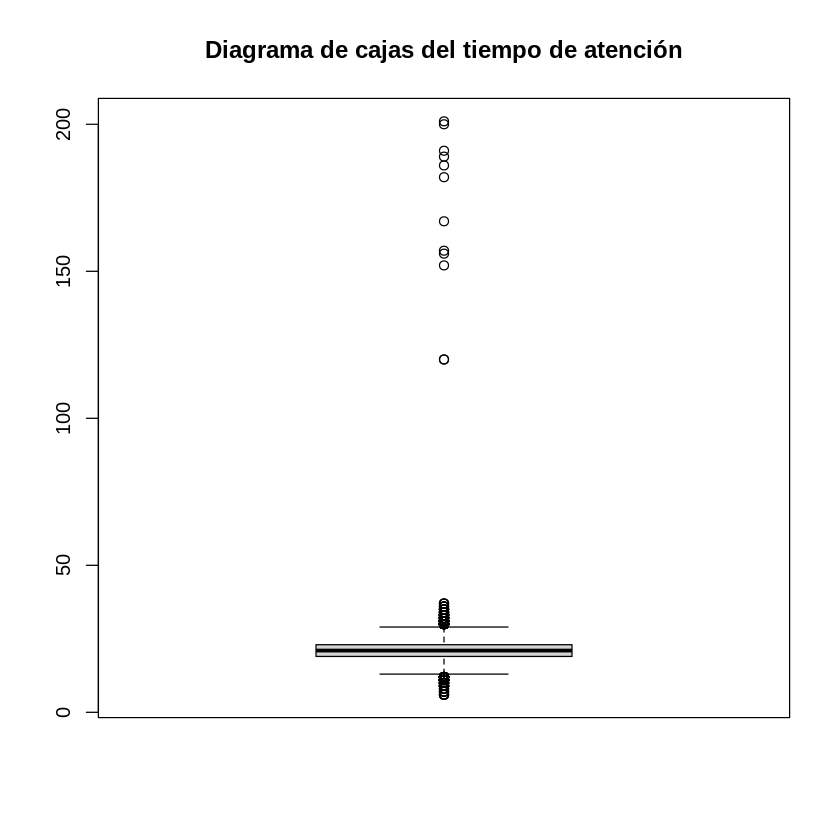

In [ ]:
boxplot(x=datap$tiempo,main="Diagrama de cajas del tiempo de atención")

Se ha validado la presencia de atipicos y al parecer son tiempos superiores a 100 minutos, siguiendo con el análiis vemos el histograma:

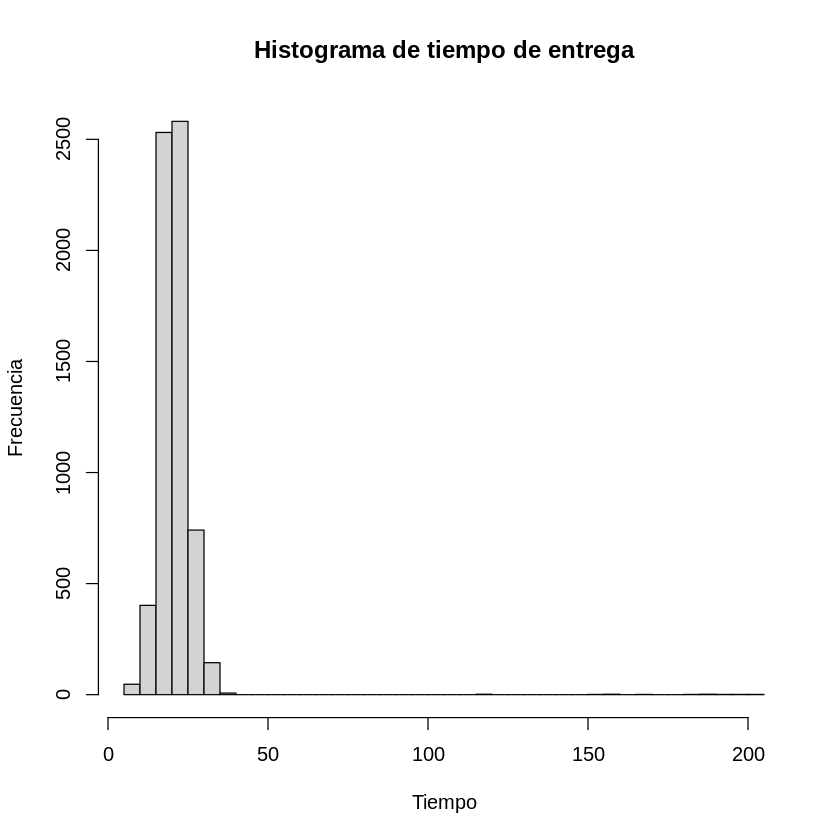

In [ ]:
hist(datap$tiempo,breaks=40,main="Histograma de tiempo de entrega",xlab = "Tiempo",ylab="Frecuencia")

In [ ]:
#Analizando el tiempo de atención por sucursal
describe.by(datap$tiempo,datap$Sucursal)

Warning message in describe.by(datap$tiempo, datap$Sucursal):
“describe.by is deprecated.  Please use the describeBy function”



 Descriptive statistics by group 
group: Sucursal1
   vars    n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 1849 20.15 1.99     20   20.15 1.48  14  26    12 -0.02    -0.05 0.05
------------------------------------------------------------ 
group: Sucursal2
   vars    n  mean  sd median trimmed  mad min max range  skew kurtosis  se
X1    1 2207 20.32 4.9     20   20.32 4.45   6  35    29 -0.04    -0.17 0.1
------------------------------------------------------------ 
group: Sucursal3
   vars    n  mean    sd median trimmed  mad min max range skew kurtosis   se
X1    1 1203 21.59 15.18     20   20.17 2.97  13 201   188  9.9   100.96 0.44
------------------------------------------------------------ 
group: Sucursal4
   vars    n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 1206 25.21 4.05     25   25.23 4.45  13  37    24 -0.03    -0.13 0.12

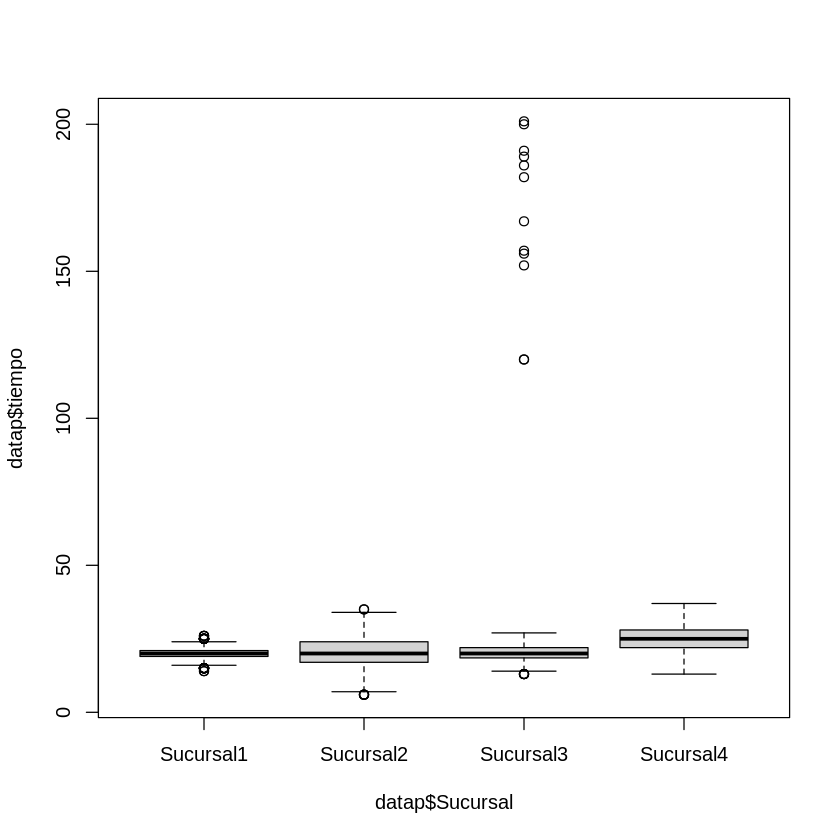

In [ ]:
boxplot(datap$tiempo~datap$Sucursal)

In [ ]:
#Formando una base auxiliar
datap2<-subset(datap,tiempo<100)

In [ ]:
#Analizando descriptivo
library('psych')
describe(datap2$tiempo)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,6453,21.14644,4.159532,21,21.01879,2.9652,6,37,31,0.2750929,0.8110811,0.05178019


In [ ]:
#Analizando el tiempo de atención por sucursal
describe.by(datap2$tiempo,datap2$Sucursal)

Warning message in describe.by(datap2$tiempo, datap2$Sucursal):
“describe.by is deprecated.  Please use the describeBy function”



 Descriptive statistics by group 
group: Sucursal1
   vars    n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 1849 20.15 1.99     20   20.15 1.48  14  26    12 -0.02    -0.05 0.05
------------------------------------------------------------ 
group: Sucursal2
   vars    n  mean  sd median trimmed  mad min max range  skew kurtosis  se
X1    1 2207 20.32 4.9     20   20.32 4.45   6  35    29 -0.04    -0.17 0.1
------------------------------------------------------------ 
group: Sucursal3
   vars    n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 1191 20.11 2.41     20   20.14 2.97  13  27    14 -0.11     0.01 0.07
------------------------------------------------------------ 
group: Sucursal4
   vars    n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 1206 25.21 4.05     25   25.23 4.45  13  37    24 -0.03    -0.13 0.12

In [ ]:
dim(datap)

[1] 6472   17

In [ ]:
dim(datap2)

[1] 6453   17

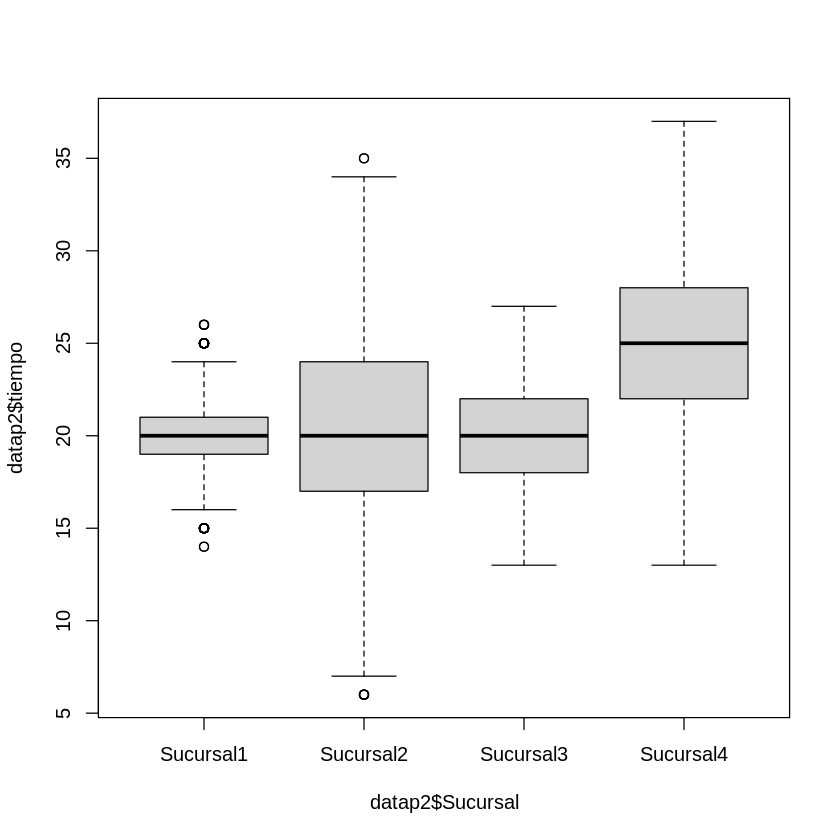

In [ ]:
boxplot(datap2$tiempo~datap2$Sucursal)

Analizando los tiempo se concluye que: En general no se está cumpliendo el tiempo de atención prometido, dado que actualemnte se tiene 21 minutos como pronedio de atención, y esto se debe principalmente por lo reportado por la sucursal cuatro cuyos tiempos van por encima de 25 minutos.Respecto a los locales de atención el primero cumple con todo teniendo una atención más estandar, la sucursal2 no tiene una calidad estándar teniendo tiempos o muy elevados o muy bajos, y en la 3 hay q hacer una revisión más a detalle para ver si los tiempos graves que presentaron fueron algo fuera de lo común.

**O3.Determinar la necesidad de gestionar los recursos, especialmente repartidores, de manera diferenciada entre días de la semana y los fines de semana para optimizar la eficiencia operativa.**


La idea sería ver el comportamiento del tiempo a travez de los días

In [ ]:
#Analizando el tiempo de atención por sucursal
describe.by(datap2$tiempo,datap2$dia)

Warning message in describe.by(datap2$tiempo, datap2$dia):
“describe.by is deprecated.  Please use the describeBy function”



 Descriptive statistics by group 
group: lunes
   vars   n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 510 16.53 2.87     17   16.68 1.48   6  22    16 -0.68     0.77 0.13
------------------------------------------------------------ 
group: martes
   vars   n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 513 16.73 2.84     17   16.85 1.48   6  22    16 -0.51      0.8 0.13
------------------------------------------------------------ 
group: miercoles
   vars   n  mean   sd median trimmed  mad min max range  skew kurtosis   se
X1    1 505 16.59 2.86     17   16.71 1.48   6  22    16 -0.55     0.69 0.13
------------------------------------------------------------ 
group: jueves
   vars   n  mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 827 19.39 2.01     19   19.15   0  17  24     7 1.21      0.3 0.07
------------------------------------------------------------ 
group: viernes
   vars    n  mean   sd median t

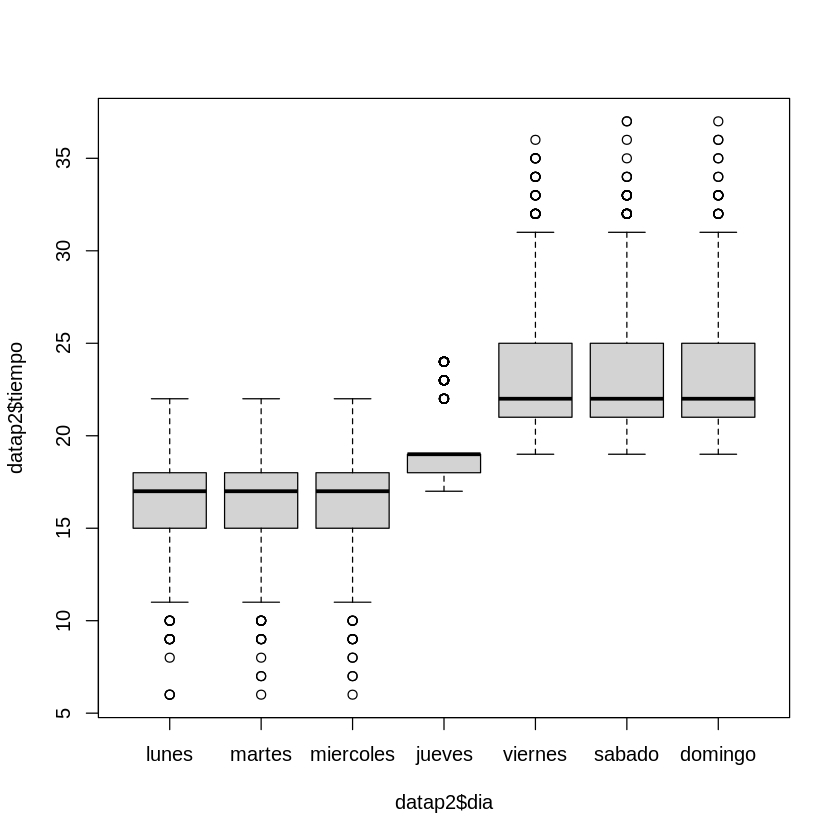

In [ ]:
boxplot(datap2$tiempo~datap2$dia)

Si es necesario una cantidad diferente de repartidores en la semana, debería aumentarse sobre todo los días viernes sabado y domindo donde el promedio se comienza alejar de los 20 minutos prometidos.

**O2.Identificar el intervalo de tiempo en el que se encuentra el 90% de los pedidos realizados para comprender mejor los patrones de demanda.**

In [ ]:
colSums(is.na(datap))

Pedido   Sucursal      tipo1      tipo2      tipo3      tipo4      tipo5 
         0          0          0       3193       6161       6413       6445 
 cantidad1  cantidad2  cantidad3  cantidad4  cantidad5        dia     tiempo 
         0       3193       6161       6413       6445          2          7 
evaluacion  FinSemana     ticket 
         0          0          0

Los resultados nos indican que se tiene 7 valores perdidos en tiempo. Dado que se ha visto que el tiempo es diferenciado por sucursal se hará la imputación por medias pero dependiendo del local

In [ ]:
for(i in 1:6472){
  if(datap$Sucursal[i]=='Sucursal1' && is.na(datap$tiempo[i])==TRUE){datap$tiempo[i]=20.15}
  if(datap$Sucursal[i]=='Sucursal2' && is.na(datap$tiempo[i])==TRUE){datap$tiempo[i]=20.32}
  if(datap$Sucursal[i]=='Sucursal3' && is.na(datap$tiempo[i])==TRUE){datap$tiempo[i]=20.11}
  if(datap$Sucursal[i]=='Sucursal4' && is.na(datap$tiempo[i])==TRUE){datap$tiempo[i]=25.21}
}

In [ ]:
colSums(is.na(datap))

Pedido   Sucursal      tipo1      tipo2      tipo3      tipo4      tipo5 
         0          0          0       3193       6161       6413       6445 
 cantidad1  cantidad2  cantidad3  cantidad4  cantidad5        dia     tiempo 
         0       3193       6161       6413       6445          2          0 
evaluacion  FinSemana     ticket 
         0          0          0

In [ ]:
Percentil5<-quantile(datap$tiempo,c(0.05))
Percentil95<-quantile(datap$tiempo,c(0.95))
print(paste("Percentil 5:",Percentil5))
print(paste("Percentil 95:",Percentil95))

[1] "Percentil 5: 15"
[1] "Percentil 95: 29"


Es que el 90% de pedidos más comunes se encuentra en el rango de 15  a 29 minutos

**O7.Medir el nivel de satisfacción de los clientes para identificar áreas de mejora y asegurarse de que la experiencia cumpla con sus expectativas**


In [ ]:
#Ejemplo:
#Se obtiene las frecuencias
tabla<-table(datap$evaluacion)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Categoría", "Frecuencia Absoluta", "Frecuencia Relativa")
#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


Categoría,Frecuencia Absoluta,Frecuencia Relativa
<fct>,<int>,<dbl>
1.Muy insatisfecho,875,0.13519778
2.Insatisfecho,1446,0.22342398
3.Ni satisfecho/ni insatisfecho,2642,0.40822002
4. Satisfecho,990,0.15296663
5.Muy satisfecho,519,0.08019159


In [ ]:
tabla_cruzada<-prop.table(table(datap$evaluacion,datap$Sucursal),margin=2)*100
tabla_cruzada

                                 
                                  Sucursal1 Sucursal2 Sucursal3 Sucursal4
  1.Muy insatisfecho               8.261339  8.786232 10.382060 33.360927
  2.Insatisfecho                  17.602592 18.432971 18.604651 40.480132
  3.Ni satisfecho/ni insatisfecho 45.518359 45.516304 45.930233 19.950331
  4. Satisfecho                   18.358531 18.251812 17.441860  3.062914
  5.Muy satisfecho                10.259179  9.012681  7.641196  3.145695

Las evaluaciones van de la mano con los tiempos de atención, siendo el peor evaluado la sucursal4

**O4.Calcular el ticket promedio por compra para comprender el gasto medio de los clientes y la rentabilidad.**

In [ ]:
library(psych)
describe(datap$ticket)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,6472,60.95952,36.8555,60,54.14832,44.478,30,300,270,1.876638,4.729906,0.4581241


El ticket promedio de la empresa es de S/60

CONCLUSIONES:

- Analizando los tiempo se concluye que: En general no se está cumpliendo el tiempo de atención prometido, dado que actualemnte se tiene 21 minutos como pronedio de atención, y esto se debe principalmente por lo reportado por la sucursal cuatro cuyos tiempos van por encima de 25 minutos.Respecto a los locales de atención el primero cumple con todo teniendo una atención más estandar, la sucursal2 no tiene una calidad estándar teniendo tiempos o muy elevados o muy bajos, y en la 3 hay q hacer una revisión más a detalle para ver si los tiempos graves que presentaron fueron algo fuera de lo común.

- Si es necesario una cantidad diferente de repartidores en la semana, debería aumentarse sobre todo los días viernes sabado y domindo donde el promedio se comienza alejar de los 20 minutos prometidos.

- Es que el 90% de pedidos más comunes se encuentra en el rango de 15  a 29 minutos
- Sólo un 8% de los clientes estan muy satisfechos. Las evaluaciones van de la mano con los tiempos de atención, siendo el peor evaluado la sucursal4
- El ticket promedio de la empresa es de S/60

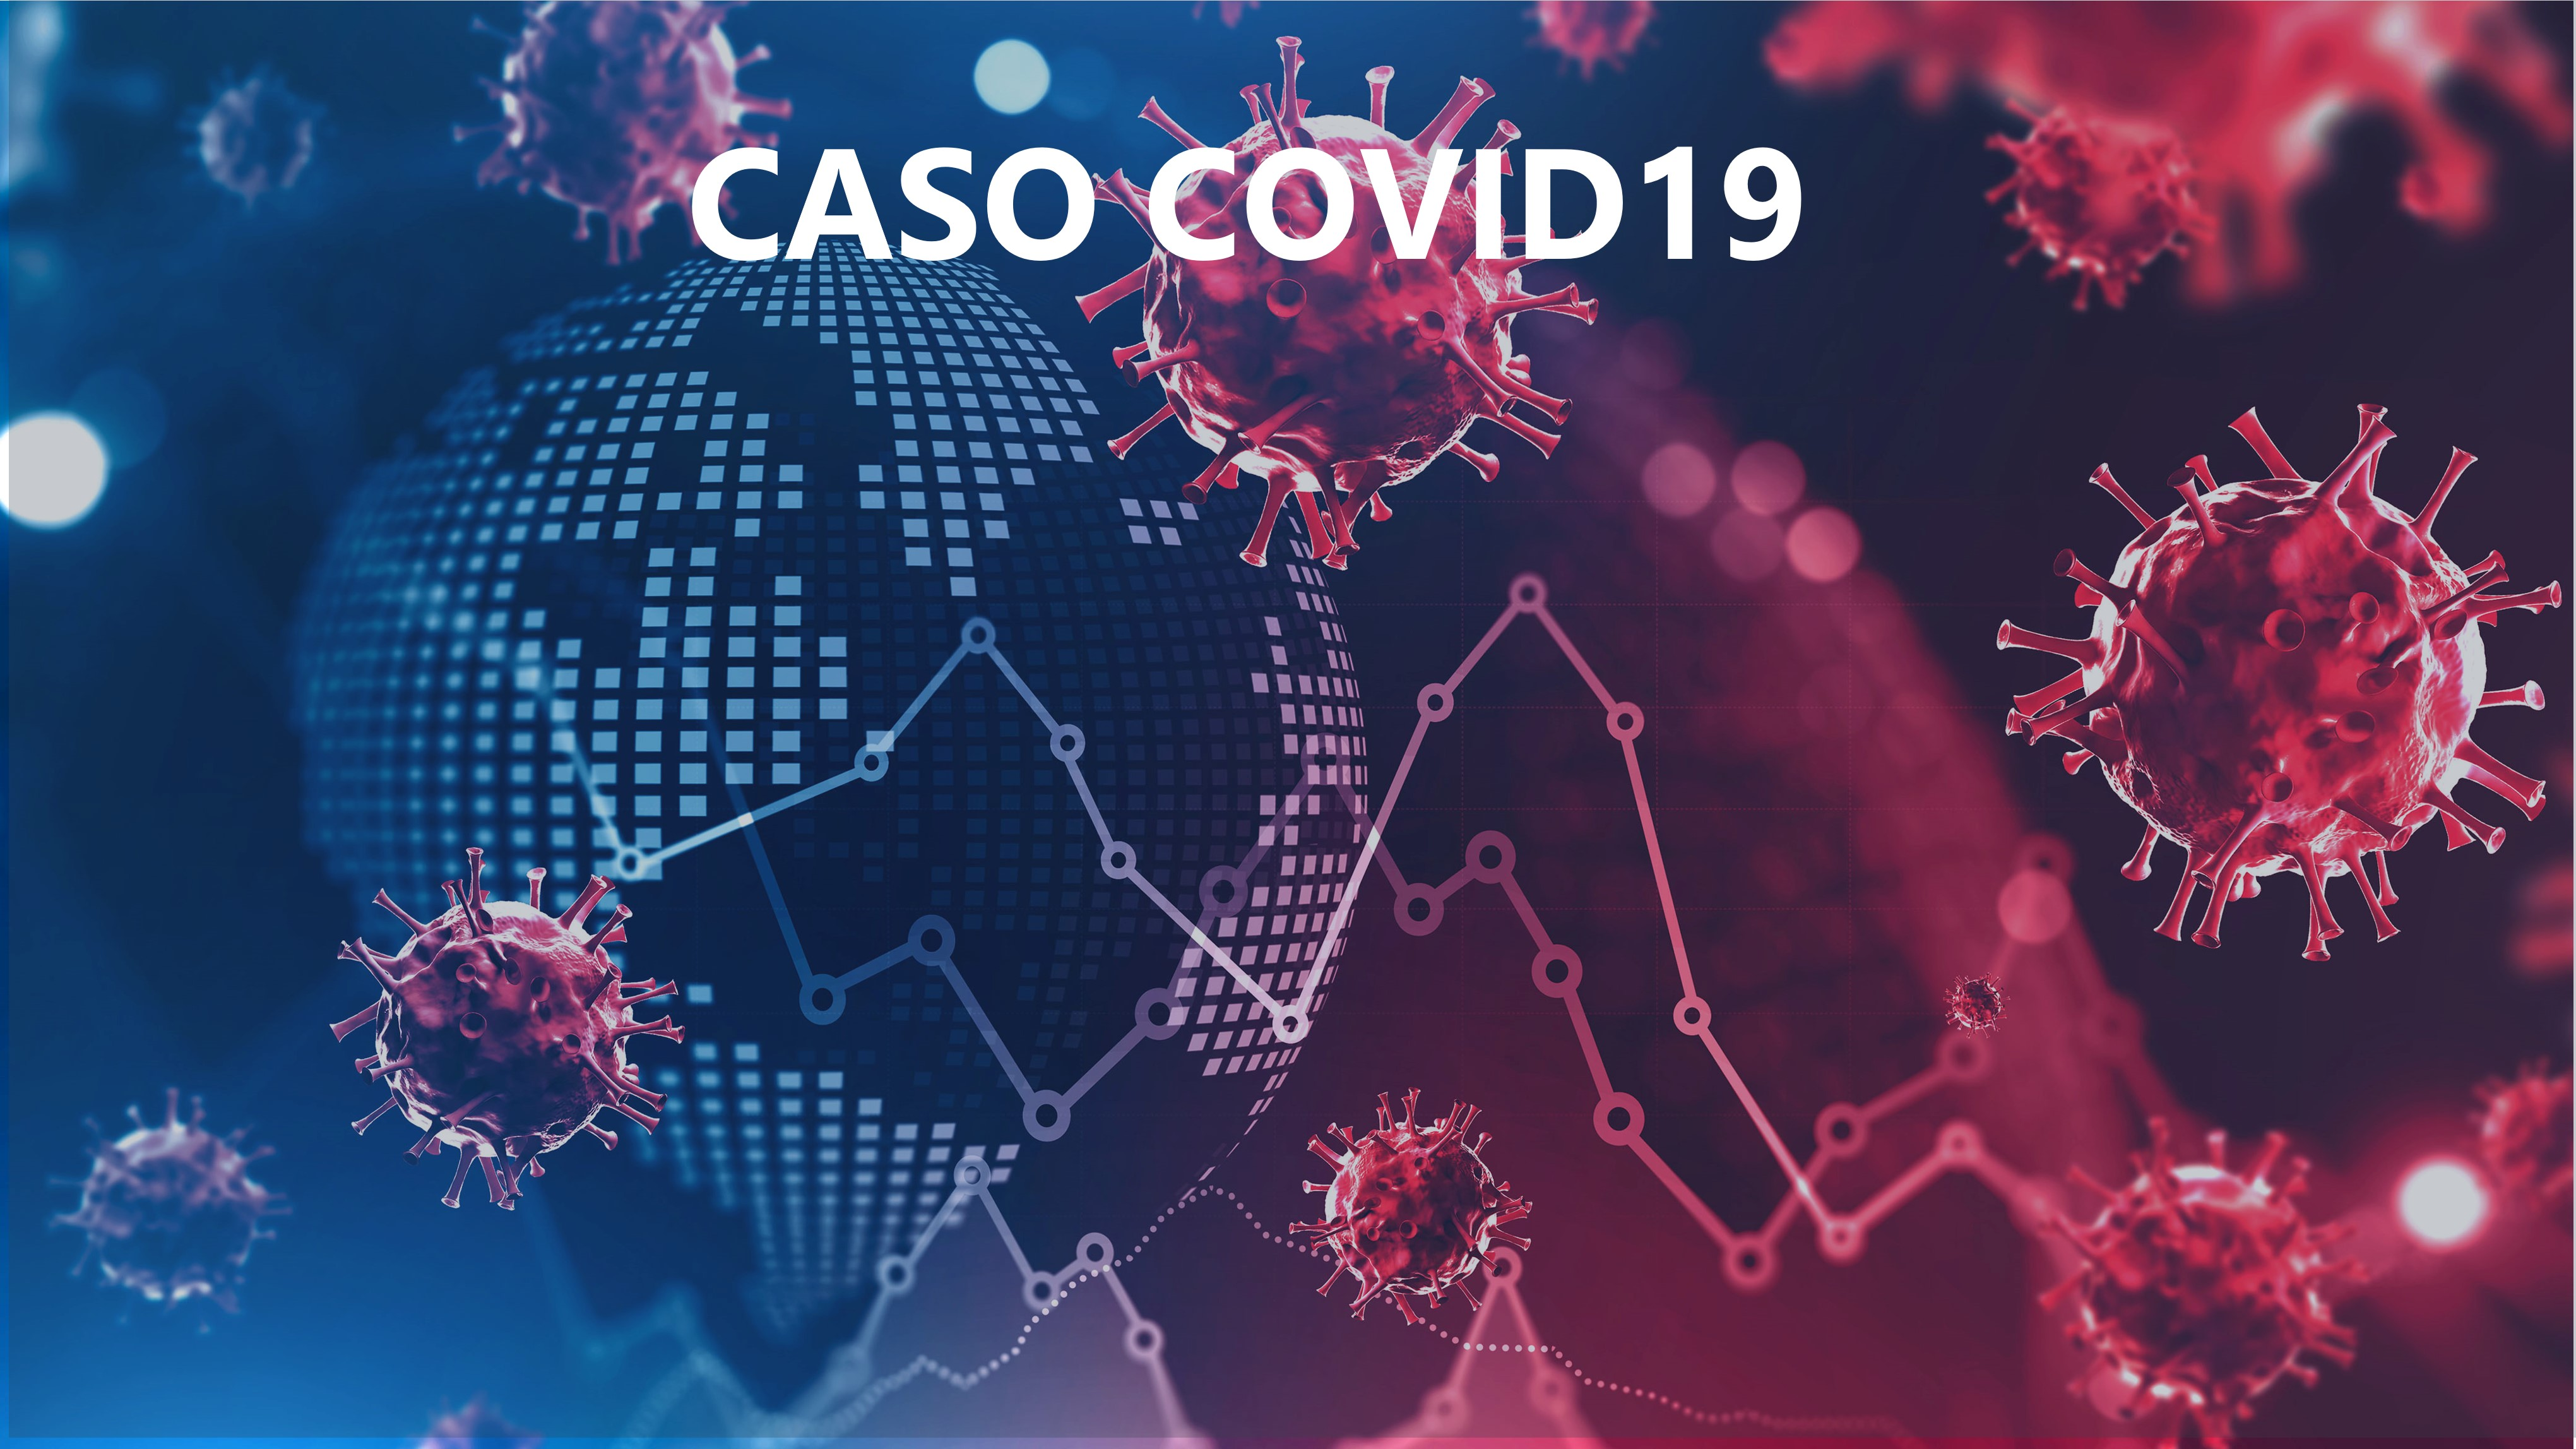

**Título: Análisis Exploratorio de Datos de Casos Positivos por COVID-19 en Perú (2020)**

El Ministerio de Salud del Perú ha puesto a disposición los datos de casos positivos por COVID-19 desde el inicio de la pandemia hasta la fecha. Los datos completos se pueden descargar desde el siguiente enlace: [enlace](https://www.datosabiertos.gob.pe/dataset/casos-positivos-por-covid-19-ministerio-de-salud-minsa/resource/690e57a6-a465-47d8-86fd).

El objetivo principal de este estudio es llevar a cabo un análisis exploratorio de los datos con el fin de comprender el perfil de las personas que dieron positivo al COVID-19 en el año 2020 en el territorio peruano. Este análisis también buscará identificar patrones y tendencias a nivel nacional.

Para lograr este objetivo, se utilizarán análisis estadístico. Se procesarán y analizarán los datos disponibles para extraer información relevante sobre las características demográficas, geográficas y temporales de los casos positivos en el año 2020.

La data del 2020 se encuentra en el archivo positivos_covid_2020.csv

Para complementar su análisis puede usar data secundaria se puede usar:

+ a. Número de habitantes en Perú en el año 2020 por departamentos [enlace](https://m.inei.gob.pe/estadisticas/indice-tematico/population-estimates-and-projections/). El punto a descargar en este link es: "Población Estimada al 30 de junio, por años calendario y sexo, según departamento"

+ b. Número de habitantes en Perú en el año 2020 por edades simples [enlace](https://www.inei.gob.pe/media/MenuRecursivo/publicaciones_digitales/Est/Lib1681/). En este link entrar a "Resultados " y descargar: "Perú: Estimaciones y Proyecciones de la Población Total, por Año Calendario y Edad Simple, 1950-2050"

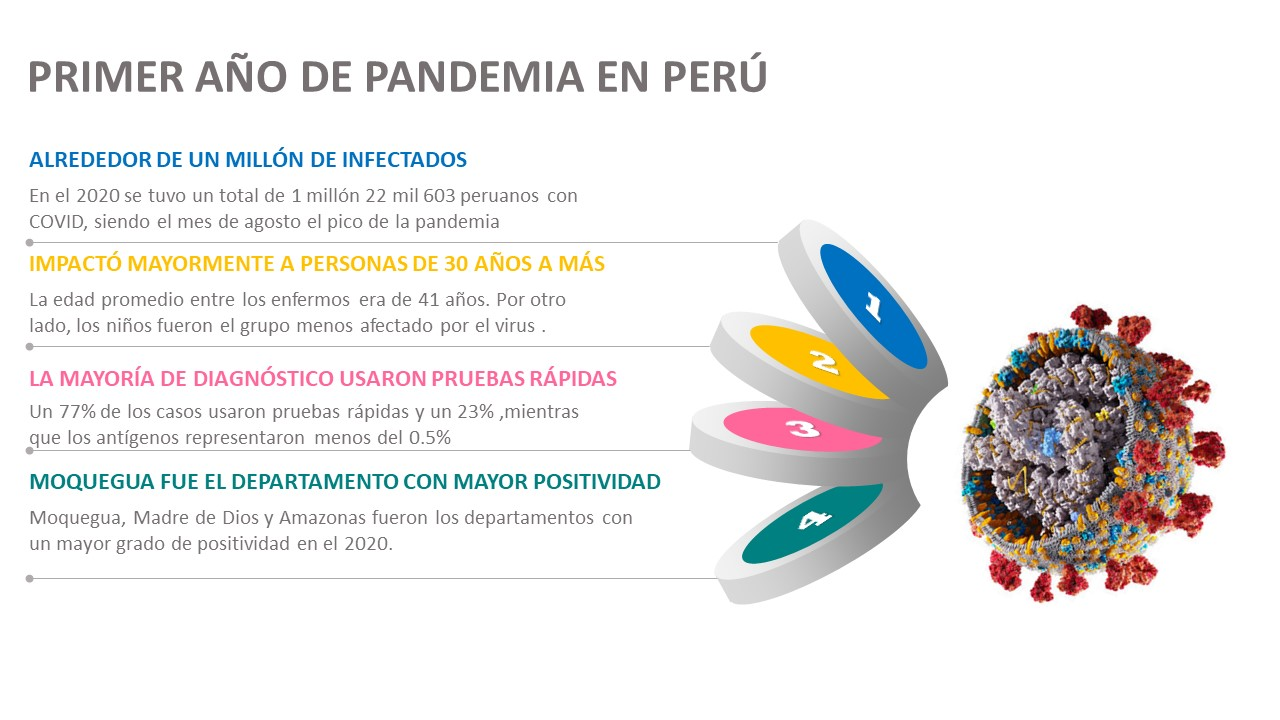

**1. Ingreso de la base de datos**:

In [ ]:
#Cargamos la base de datos
datac<-read.csv("positivos_covid_2020.csv",header = TRUE)

In [ ]:
#Mostrando una vista de la data
head(datac,n=15L)

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,20221129,LIMA,LIMA,LA MOLINA,PCR,25,MASCULINO,20200306,150114,34978840
2,20221129,AREQUIPA,AREQUIPA,AREQUIPA,PCR,29,MASCULINO,20200307,40101,29640291
3,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,74,FEMENINO,20200307,150140,7800643
4,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,51,MASCULINO,20200307,150140,10629488
5,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,25,MASCULINO,20200307,150140,12149681
6,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,7,MASCULINO,20200307,150140,12211040
7,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,25,MASCULINO,20200308,150140,25732224
8,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,66,FEMENINO,20200308,150140,9432658
9,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,78,MASCULINO,20200309,150140,15640141


**2. ANALIZANDO LA PRIMERA CONCLUSIÓN**:

´Para saber la cantidad de casos de covid se revisa el tamaño de la base, dado que un registro es un caso detectado.

In [ ]:
dim(datac)

[1] 1022603      10

In [ ]:
#Mostrando la estructura de la base
str(datac)

'data.frame':	1022603 obs. of  10 variables:
 $ FECHA_CORTE    : int  20221129 20221129 20221129 20221129 20221129 20221129 20221129 20221129 20221129 20221129 ...
 $ DEPARTAMENTO   : chr  "LIMA" "AREQUIPA" "LIMA" "LIMA" ...
 $ PROVINCIA      : chr  "LIMA" "AREQUIPA" "LIMA" "LIMA" ...
 $ DISTRITO       : chr  "LA MOLINA" "AREQUIPA" "SANTIAGO DE SURCO" "SANTIAGO DE SURCO" ...
 $ METODODX       : chr  "PCR" "PCR" "PCR" "PCR" ...
 $ EDAD           : int  25 29 74 51 25 7 25 66 78 27 ...
 $ SEXO           : chr  "MASCULINO" "MASCULINO" "FEMENINO" "MASCULINO" ...
 $ FECHA_RESULTADO: int  20200306 20200307 20200307 20200307 20200307 20200307 20200308 20200308 20200309 20200309 ...
 $ UBIGEO         : int  150114 40101 150140 150140 150140 150140 150140 150140 150140 100101 ...
 $ id_persona     : int  34978840 29640291 7800643 10629488 12149681 12211040 25732224 9432658 15640141 24414450 ...


Se concluye que el número de casos con covid en el 2020 fue de un millín 22 mil 603 personas.

Para el segundo punto es necesario formar la variable mes

1-4: Año

5-6: Mes

7-8: día

FECHA_RESULTADO:20200309

In [ ]:
datac$mes<-as.integer(substr(datac$FECHA_RESULTADO,5,6))

In [ ]:
head(datac)

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,mes
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>
1,20221129,LIMA,LIMA,LA MOLINA,PCR,25,MASCULINO,20200306,150114,34978840,3
2,20221129,AREQUIPA,AREQUIPA,AREQUIPA,PCR,29,MASCULINO,20200307,40101,29640291,3
3,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,74,FEMENINO,20200307,150140,7800643,3
4,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,51,MASCULINO,20200307,150140,10629488,3
5,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,25,MASCULINO,20200307,150140,12149681,3
6,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,7,MASCULINO,20200307,150140,12211040,3


In [ ]:
#Etiquetando la base de datos
datac$mes<-factor(datac$mes,levels=1:12,labels=c("enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"))

In [ ]:
head(datac)

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,mes
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<fct>
1,20221129,LIMA,LIMA,LA MOLINA,PCR,25,MASCULINO,20200306,150114,34978840,marzo
2,20221129,AREQUIPA,AREQUIPA,AREQUIPA,PCR,29,MASCULINO,20200307,40101,29640291,marzo
3,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,74,FEMENINO,20200307,150140,7800643,marzo
4,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,51,MASCULINO,20200307,150140,10629488,marzo
5,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,25,MASCULINO,20200307,150140,12149681,marzo
6,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,7,MASCULINO,20200307,150140,12211040,marzo


In [ ]:
#Sacando la tabla de distribución de frecuencias
tabla<-table(datac$mes)
tabla


     enero    febrero      marzo      abril       mayo      junio      julio 
         0          0       1317      46500     131511     121556     144010 
    agosto septiembre    octubre  noviembre  diciembre 
    243261     157186      81302      48244      47716 

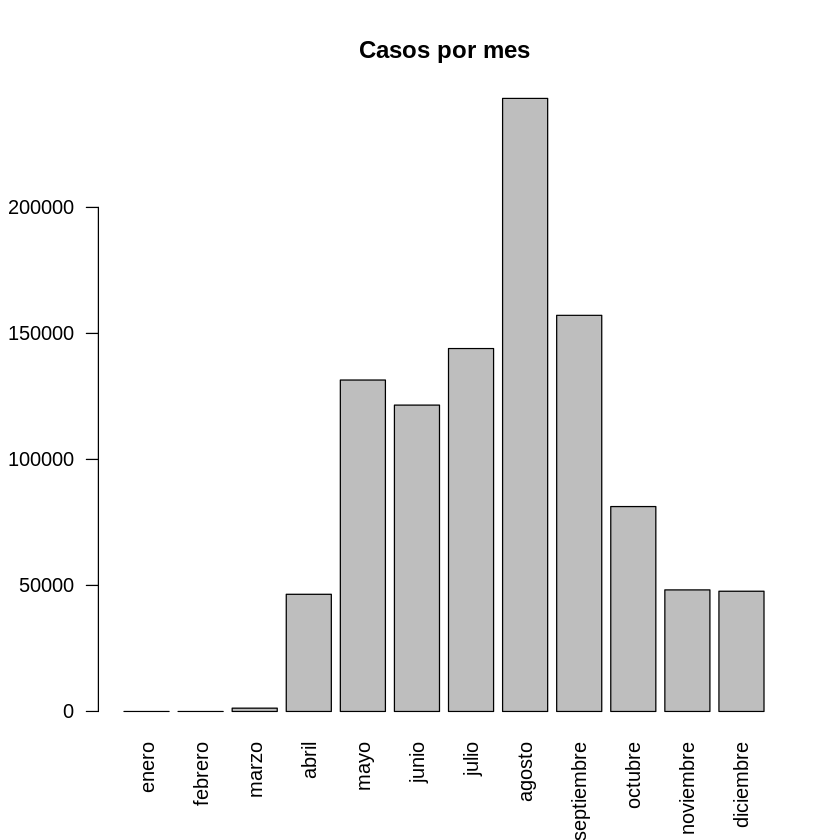

In [ ]:
#Gráfico de barras
barplot(tabla,
        main="Casos por mes",
        las=2
        )

**2. Analizando la segunda conclusión**

Se hara una construcción edad_recodificada
- Infantil: De 0 a 14 años
- Joven: De 15 a 29
- Adulto joven: 30 a 44
- Adulto: 45 a 59
- Adulto mayores: 60 a más


Tanto de cuadro de distibución de frecuenias como el grafico de barras se va claramente que Agosto 2020 fue el pico de la pandemia

In [ ]:
#Poniendo los puntos de corte
puntos_corte<-c(-1,14,29,44,59,Inf)
#Etiquetas
etiquetas<-c("Infantil","Joven","Adulto joven","Adulto","Adulto mayor")
#Formando la variable
datac$edad_recodificada<-factor(cut(datac$EDAD,breaks=puntos_corte,labels=etiquetas))

In [ ]:
head(datac)

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona,mes,edad_recodificada
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<fct>,<fct>
1,20221129,LIMA,LIMA,LA MOLINA,PCR,25,MASCULINO,20200306,150114,34978840,marzo,Joven
2,20221129,AREQUIPA,AREQUIPA,AREQUIPA,PCR,29,MASCULINO,20200307,40101,29640291,marzo,Joven
3,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,74,FEMENINO,20200307,150140,7800643,marzo,Adulto mayor
4,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,51,MASCULINO,20200307,150140,10629488,marzo,Adulto
5,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,25,MASCULINO,20200307,150140,12149681,marzo,Joven
6,20221129,LIMA,LIMA,SANTIAGO DE SURCO,PCR,7,MASCULINO,20200307,150140,12211040,marzo,Infantil


In [ ]:
#Ejemplo: Obtener los resultados todos juntos
#Se obtiene las frecuencias
tabla<-table(datac$edad_recodificada)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Grupo", "Afectados", "Distribución")
#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


Grupo,Afectados,Distribución
<fct>,<int>,<dbl>
Infantil,51958,0.05081228
Joven,215972,0.21120964
Adulto joven,323141,0.31601548
Adulto,251517,0.24597085
Adulto mayor,179960,0.17599174


Por encima de 30 años se dio la mayor cantidad de casos. Dado que de los contagiados sólo un 5% son niños, se puede decir que fue el grupo menos afectado por la pandemia.

Analizando la edad que es una variable del tipo numérica:

In [ ]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
library(psych)
describe(datac$EDAD)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1022548,41.99266,18.09053,41,41.50336,19.2738,0,120,120,0.2356148,-0.2320853,0.01788996


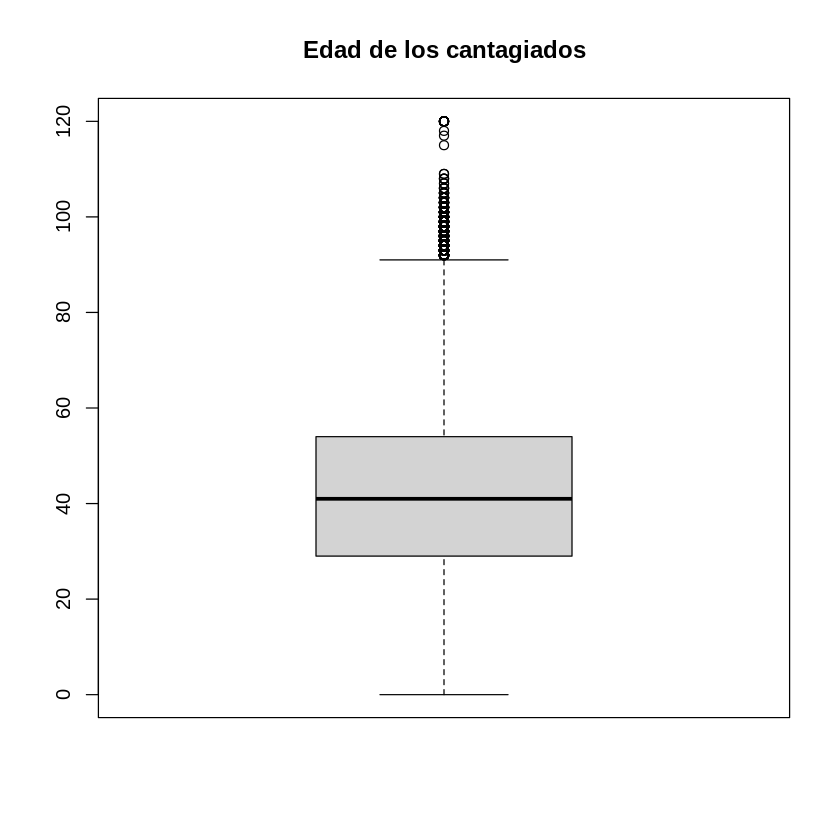

In [ ]:
#Analizando el gráfico de cajas
boxplot(x=datac$EDAD,main="Edad de los cantagiados")

Revisando los descriptivos y la gráfica se tiene que la edad de los contagiados esta en torno a 41 años

Analizando la incidencia:

In [ ]:
#Cargamos la base de datos
PoblacionEdad<-read.csv("EdadesSimples_2020(Original)_Subir.csv",header = TRUE)

In [ ]:
head(PoblacionEdad)

,Edad,poblacion
,<int>,<int>
1,0,572593
2,1,566365
3,2,558917
4,3,550090
5,4,540659
6,5,512845


In [ ]:
#Poniendo los puntos de corte
puntos_corte<-c(-1,14,29,44,59,Inf)
#Etiquetas
etiquetas<-c("Infantil","Joven","Adulto joven","Adulto","Adulto mayor")
#Formando la variable
PoblacionEdad$Grupo<-factor(cut(PoblacionEdad$Edad,breaks=puntos_corte,labels=etiquetas))

In [ ]:
head(PoblacionEdad)

,Edad,poblacion,Grupo
,<int>,<int>,<fct>
1,0,572593,Infantil
2,1,566365,Infantil
3,2,558917,Infantil
4,3,550090,Infantil
5,4,540659,Infantil
6,5,512845,Infantil


In [ ]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
PoblacionResumida<-PoblacionEdad%>%
  group_by(Grupo)%>%
  summarize(PoblacionS=sum(poblacion))
PoblacionResumida


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Grupo,PoblacionS
<fct>,<int>
Infantil,8124137
Joven,7869975
Adulto joven,7276339
Adulto,5215059
Adulto mayor,4140438


In [ ]:
Covid_Edades<-tabla %>%
  left_join(PoblacionResumida)

Joining with `by = join_by(Grupo)`


In [ ]:
Covid_Edades

Grupo,Afectados,Distribución,PoblacionS
<fct>,<int>,<dbl>,<int>
Infantil,51958,0.05081228,8124137
Joven,215972,0.21120964,7869975
Adulto joven,323141,0.31601548,7276339
Adulto,251517,0.24597085,5215059
Adulto mayor,179960,0.17599174,4140438


In [ ]:
Covid_Edades$Positividad<-(Covid_Edades$Afectados/Covid_Edades$PoblacionS)*100

In [ ]:
Covid_Edades

Grupo,Afectados,Distribución,PoblacionS,Positividad
<fct>,<int>,<dbl>,<int>,<dbl>
Infantil,51958,0.05081228,8124137,0.639551
Joven,215972,0.21120964,7869975,2.744253
Adulto joven,323141,0.31601548,7276339,4.440983
Adulto,251517,0.24597085,5215059,4.822898
Adulto mayor,179960,0.17599174,4140438,4.346400


Analizando como se detecto si tenían codvid

In [ ]:
#Ejemplo: Obtener los resultados todos juntos
#Se obtiene las frecuencias
tabla<-table(datac$METODODX)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("Grupo", "Afectados", "Distribución")
#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


Grupo,Afectados,Distribución
<fct>,<int>,<dbl>
AG,582,0.0005691358
PCR,235462,0.2302574900
PR,786559,0.7691733742


**Analizando la positivad por departamentos**:

In [ ]:
#Ejemplo: Obtener los resultados todos juntos
#Se obtiene las frecuencias
tabla<-table(datac$DEPARTAMENTO)
#Se crea las frecuencias relativas
tabla<-transform(tabla,FrecuenciaRelativa=prop.table(Freq))
#Ponemos las cabeceras
colnames(tabla) <- c("NOMBDEP", "Afectados", "Distribución")
#Se imprime la tabla
print('Tabla de distribución de frecuencias:')
tabla

[1] "Tabla de distribución de frecuencias:"


NOMBDEP,Afectados,Distribución
<fct>,<int>,<dbl>
AMAZONAS,18562,0.018151717
ANCASH,31075,0.030388137
APURIMAC,7682,0.007512202
AREQUIPA,48571,0.047497416
AYACUCHO,15375,0.015035160
CAJAMARCA,25480,0.024916805
CALLAO,43704,0.042737993
CUSCO,25510,0.024946142
HUANCAVELICA,7924,0.007748853


In [ ]:
#Cargamos la base de datos
PoblacionDepartamento<-read.csv("PoblacionDepartamentos2020(Original)_Subir.csv",header = TRUE)

In [ ]:
PoblacionDepartamento

NOMBDEP,Poblacion
<chr>,<int>
AMAZONAS,426806
ANCASH,1180638
APURIMAC,430736
AREQUIPA,1497438
AYACUCHO,668213
CAJAMARCA,1453711
CALLAO,1129854
CUSCO,1357075
HUANCAVELICA,365317


In [ ]:
Covid_Departamento<-tabla %>%
  left_join(PoblacionDepartamento)

Joining with `by = join_by(NOMBDEP)`


In [ ]:
Covid_Departamento

NOMBDEP,Afectados,Distribución,Poblacion
<chr>,<int>,<dbl>,<int>
AMAZONAS,18562,0.018151717,426806
ANCASH,31075,0.030388137,1180638
APURIMAC,7682,0.007512202,430736
AREQUIPA,48571,0.047497416,1497438
AYACUCHO,15375,0.015035160,668213
CAJAMARCA,25480,0.024916805,1453711
CALLAO,43704,0.042737993,1129854
CUSCO,25510,0.024946142,1357075
HUANCAVELICA,7924,0.007748853,365317


In [ ]:
Covid_Departamento$Positividad<-(Covid_Departamento$Afectados/Covid_Departamento$Poblacion)*100

In [ ]:
Covid_Departamento

NOMBDEP,Afectados,Distribución,Poblacion,Positividad
<chr>,<int>,<dbl>,<int>,<dbl>
AMAZONAS,18562,0.018151717,426806,4.349049
ANCASH,31075,0.030388137,1180638,2.632051
APURIMAC,7682,0.007512202,430736,1.783459
AREQUIPA,48571,0.047497416,1497438,3.243607
AYACUCHO,15375,0.015035160,668213,2.300913
CAJAMARCA,25480,0.024916805,1453711,1.752756
CALLAO,43704,0.042737993,1129854,3.868110
CUSCO,25510,0.024946142,1357075,1.879778
HUANCAVELICA,7924,0.007748853,365317,2.169075


In [ ]:
ordenando<-Covid_Departamento[order(Covid_Departamento$Positividad),]
ordenando

,NOMBDEP,Afectados,Distribución,Poblacion,Positividad
,<chr>,<int>,<dbl>,<int>,<dbl>
21,PUNO,19477,0.019046492,1237997,1.573267
6,CAJAMARCA,25480,0.024916805,1453711,1.752756
3,APURIMAC,7682,0.007512202,430736,1.783459
13,LA LIBERTAD,37762,0.036927332,2016771,1.872399
8,CUSCO,25510,0.024946142,1357075,1.879778
12,JUNIN,28532,0.027901346,1361467,2.095681
20,PIURA,43736,0.042769286,2047954,2.135595
9,HUANCAVELICA,7924,0.007748853,365317,2.169075
5,AYACUCHO,15375,0.015035160,668213,2.300913
